In [2]:
# Importing the required libraries
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# import the iris dataset
iris = datasets.load_iris()
X = iris.data
Y = iris.target

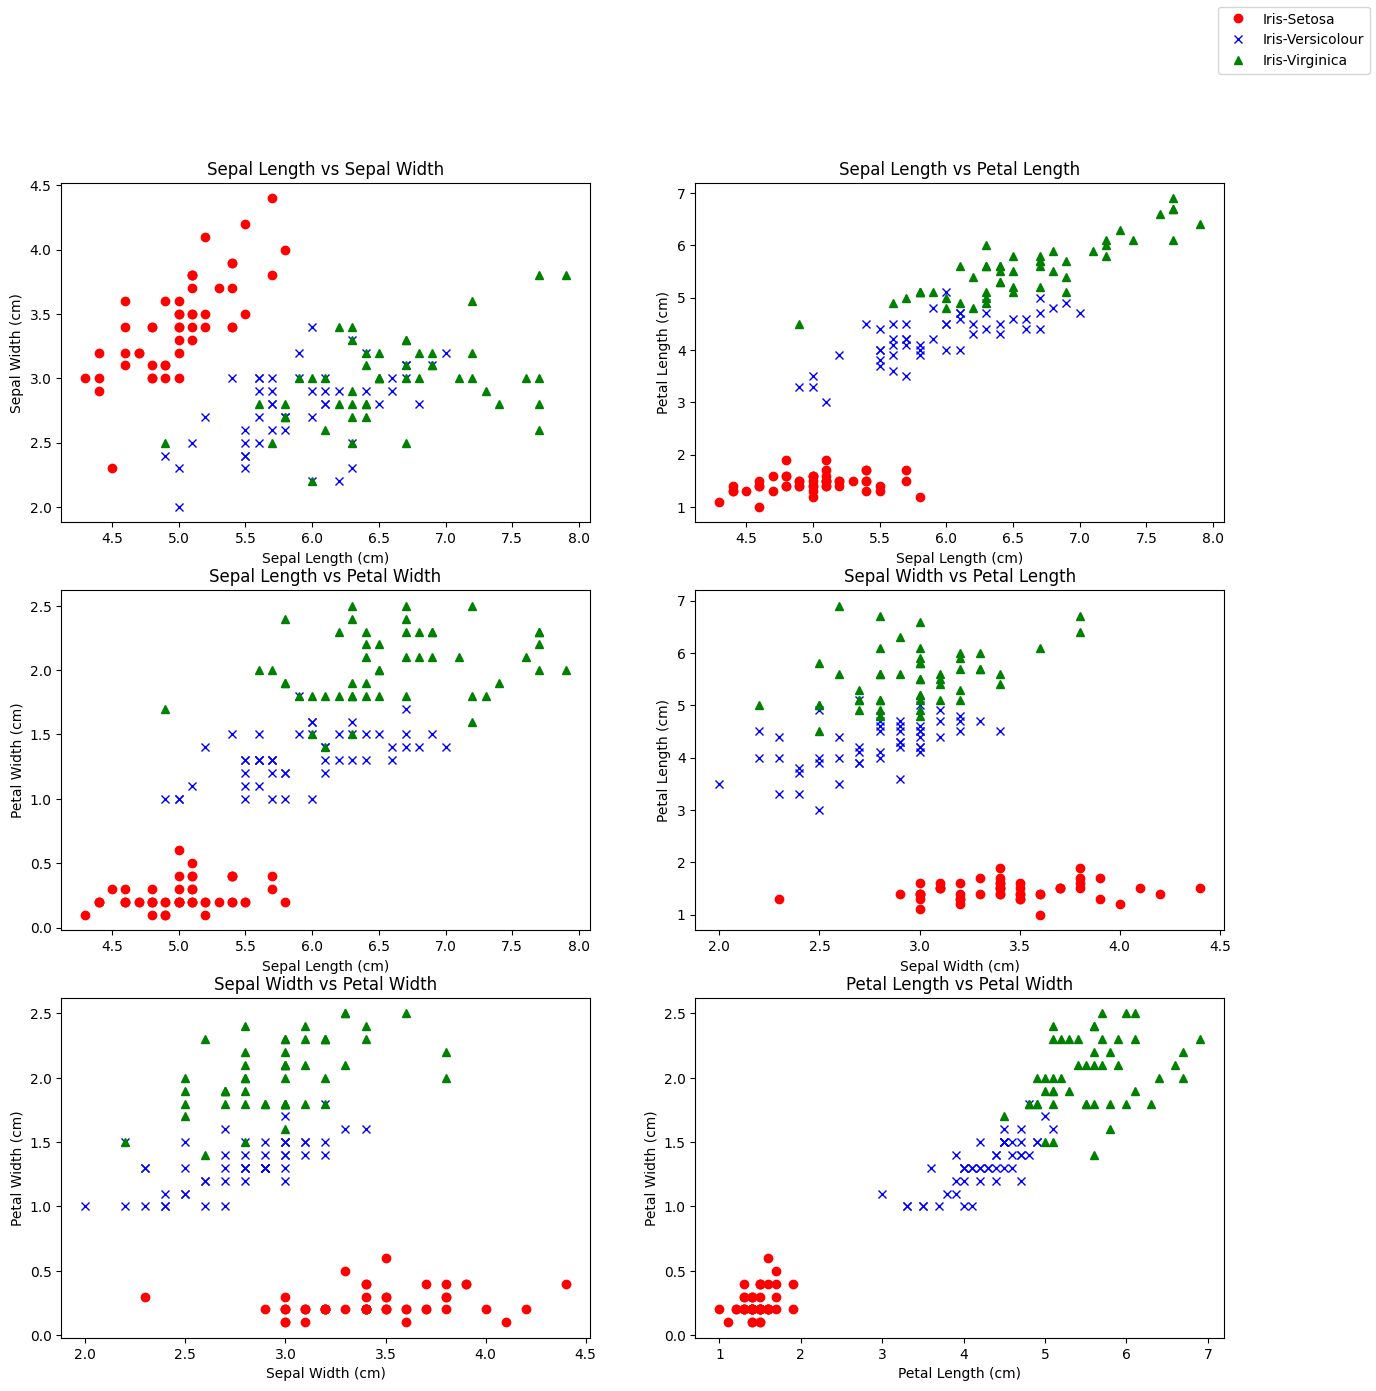

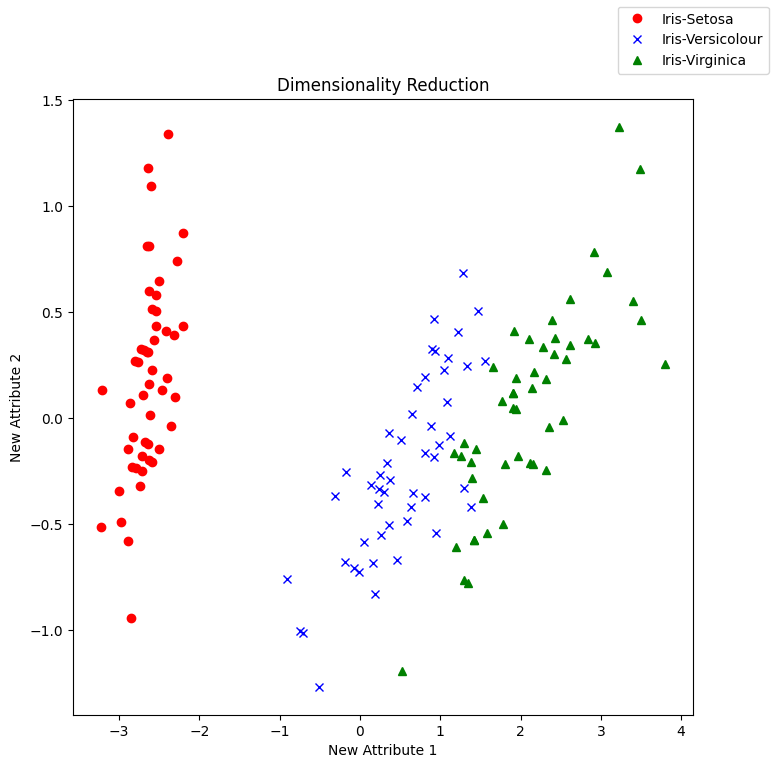

In [3]:
# Data Exploration
## Split X into four categories
sepal_length = X[:,0]
sepal_width = X[:,1]
petal_length = X[:,2]
petal_width = X[:,3]

# Create combinations and labels 
all= [sepal_length,sepal_width,petal_length,petal_width]
label = ['Sepal Length','Sepal Width', 'Petal Length','Petal Width']
combos = []
labels = []
for i in range(len(all)):
  for j in range(i+1,len(all)):
    combos.append((all[i],all[j]))
    labels.append((label[i],label[j]))

# Plot results
fig, ax = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(len(combos)):
  ax1=plt.subplot(321+int(i))
  x=combos[i][0]
  y=combos[i][1]
  xlabel=labels[i][0]
  ylabel=labels[i][1]
  ax1.plot([x[j] for j in range(len(sepal_length)) if Y[j]==0],[y[j] for j in range(len(sepal_width)) if Y[j]==0], 'ro',
          [x[j] for j in range(len(sepal_length)) if Y[j]==1],[y[j] for j in range(len(sepal_width)) if Y[j]==1], 'bx',
          [x[j] for j in range(len(sepal_length)) if Y[j]==2],[y[j] for j in range(len(sepal_width)) if Y[j]==2], 'g^')
  ax1.set_title(f'{xlabel} vs {ylabel}')
  ax1.set_xlabel(f'{xlabel} (cm)')
  ax1.set_ylabel(f'{ylabel} (cm)')


fig.legend(['Iris-Setosa','Iris-Versicolour','Iris-Virginica'])
# Save figure to ./pages/data_exploration_images/plot1.png
plt.savefig('./pages/data_exploration_images/plot1.png')

# Create PCA instance
pca = PCA(n_components=3)
pca.fit(X)
X_2D = pca.transform(X)

# Plot PCA results
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)

x = X_2D
y = Y

ax.plot([x[j][0] for j in range(len(x)) if Y[j]==0],[x[j][1] for j in range(len(x)) if Y[j]==0], 'ro',
          [x[j][0] for j in range(len(x)) if Y[j]==1],[x[j][1] for j in range(len(x)) if Y[j]==1], 'bx',
          [x[j][0] for j in range(len(x)) if Y[j]==2],[x[j][1] for j in range(len(x)) if Y[j]==2], 'g^')
ax.set_title(f'Dimensionality Reduction')
ax.set_xlabel(f'New Attribute 1')
ax.set_ylabel(f'New Attribute 2')


fig.legend(['Iris-Setosa','Iris-Versicolour','Iris-Virginica'])
# Save figure to ./pages/data_exploration_images/plot2.png
plt.savefig('./pages/data_exploration_images/plot2.png')

C:\Users\suqia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_plot\confusion_matrix.py:140: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
C:\Users\suqia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  war

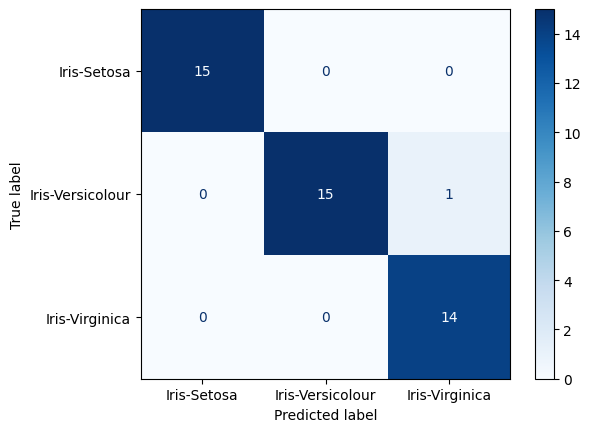

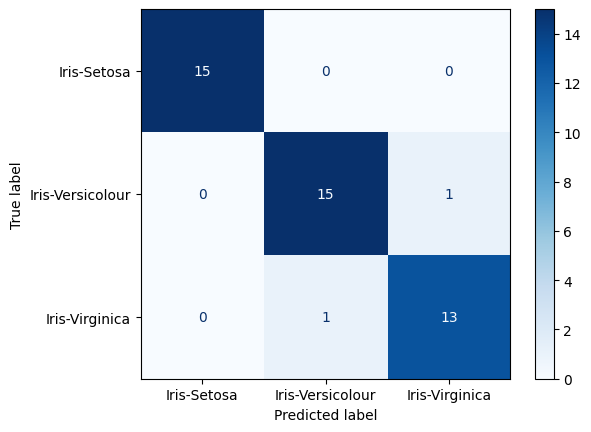

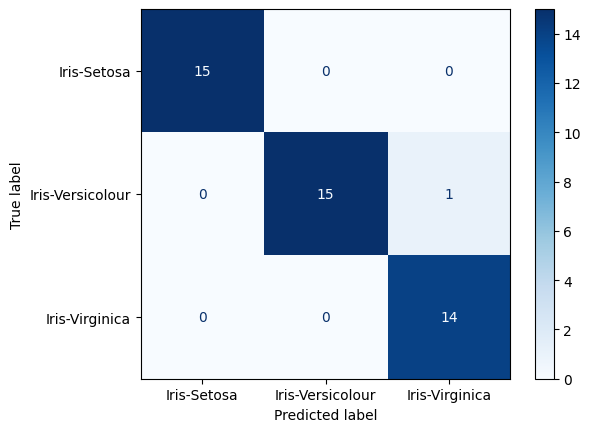

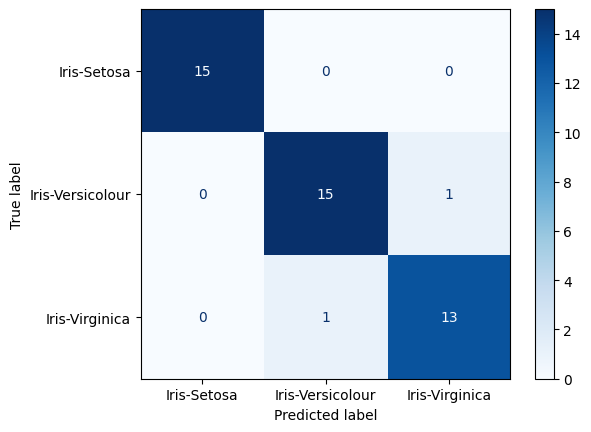

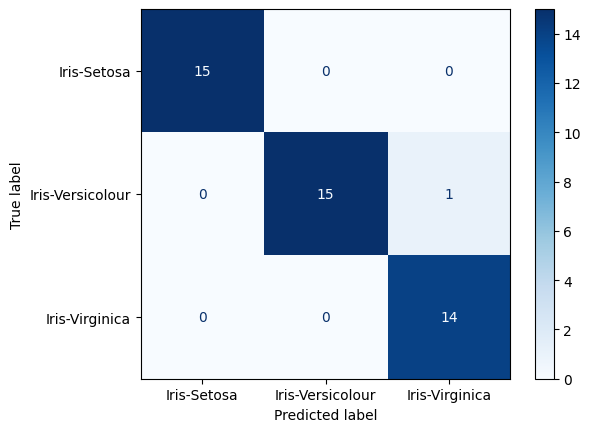

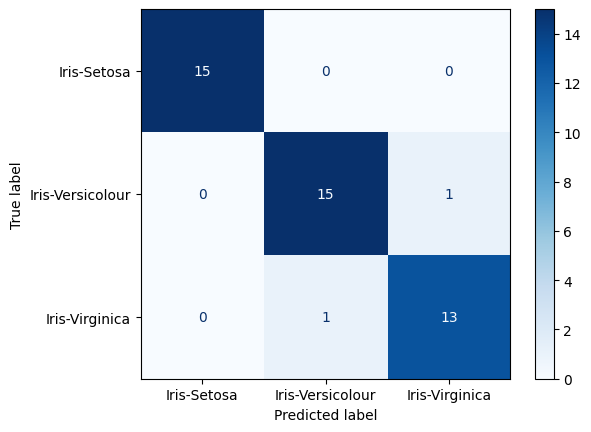

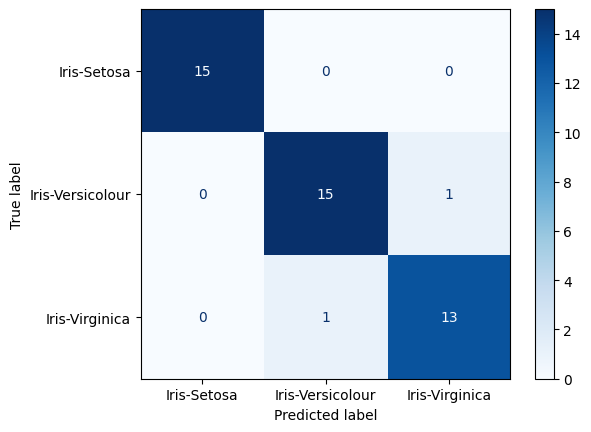

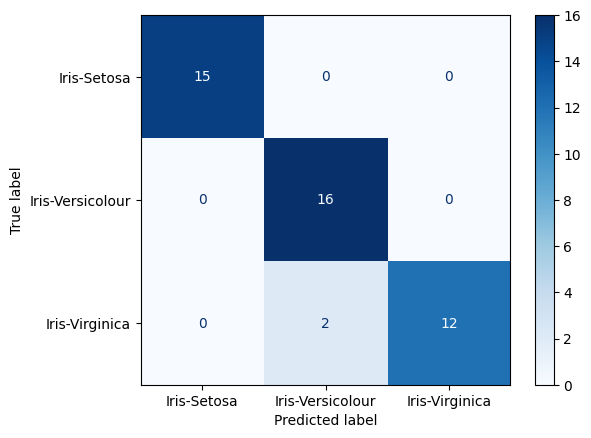

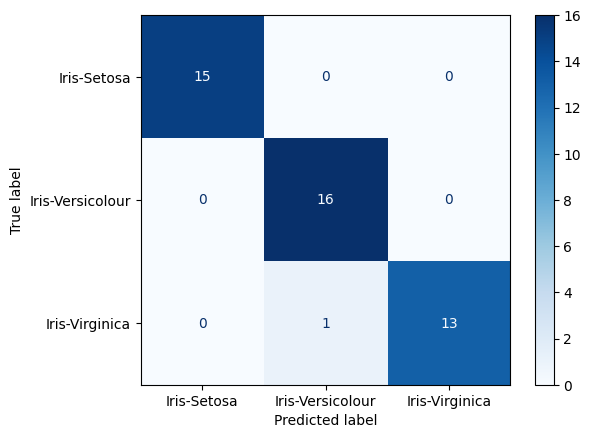

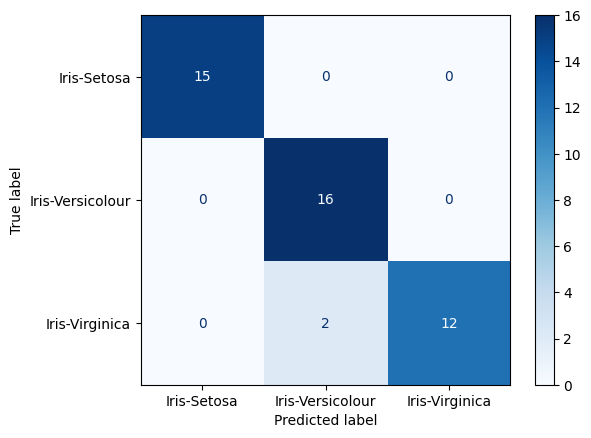

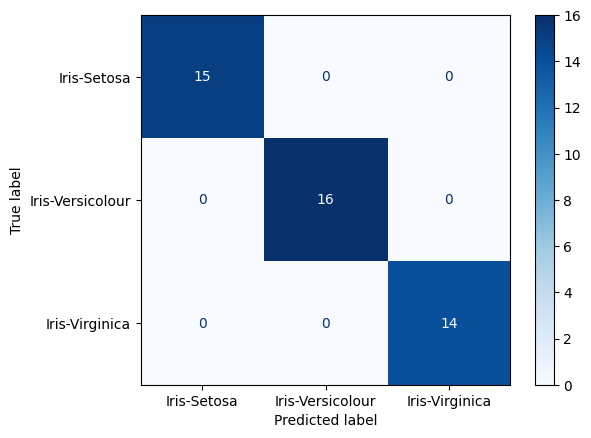

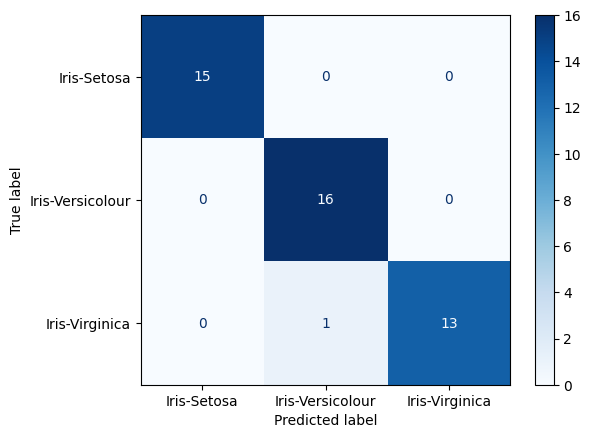

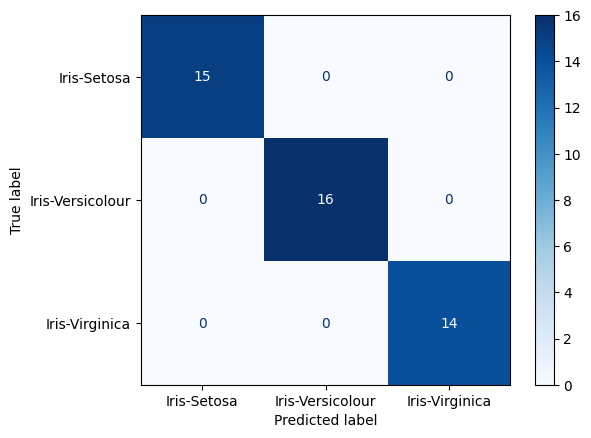

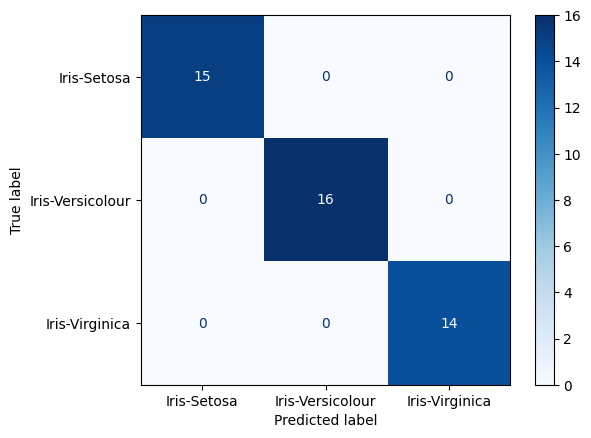

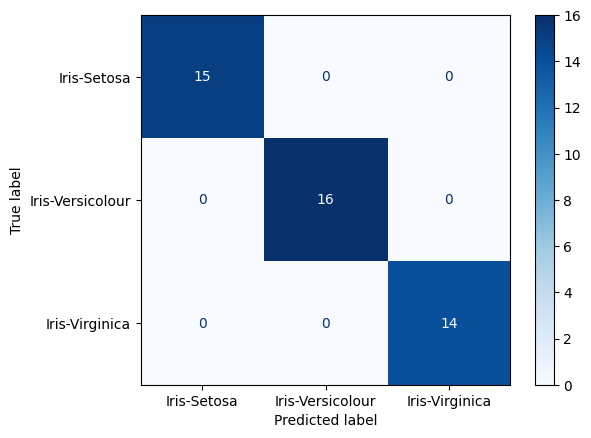

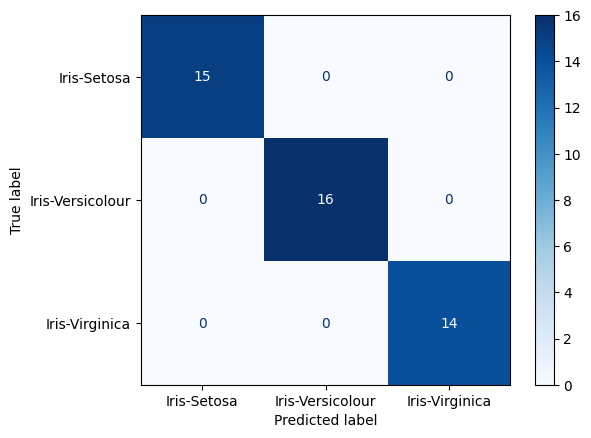

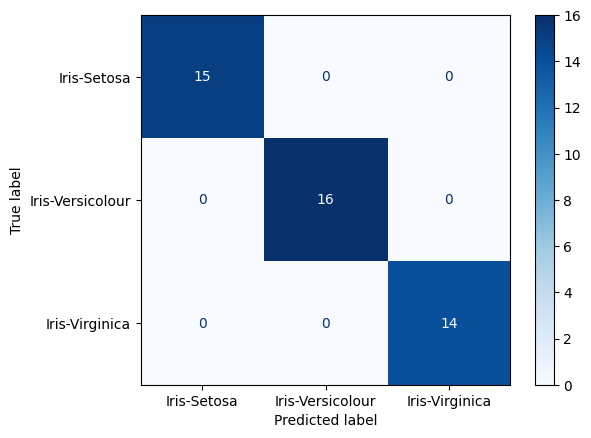

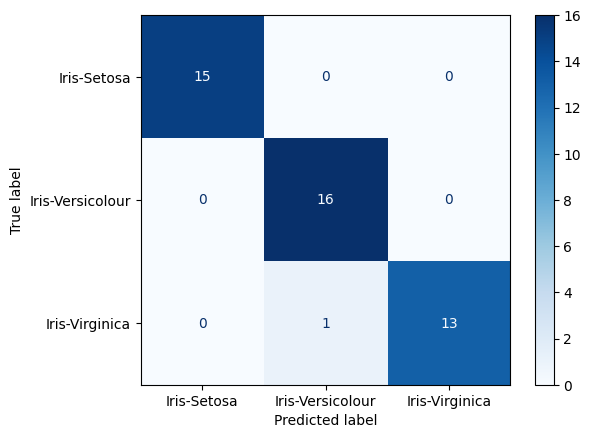

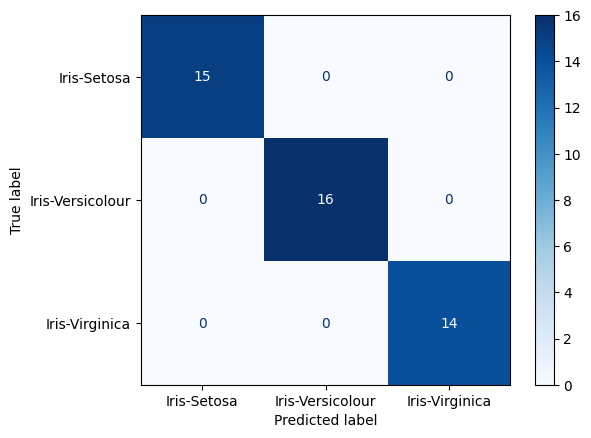

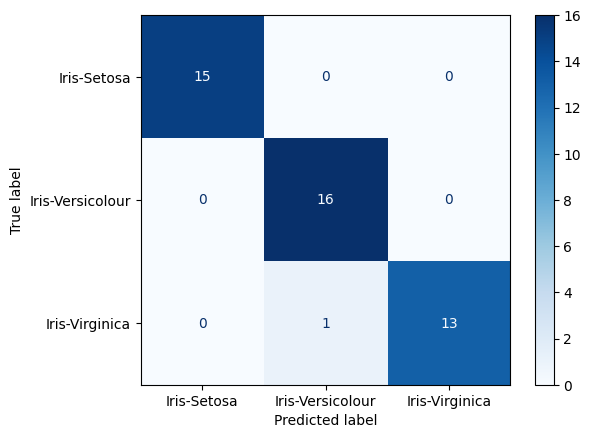

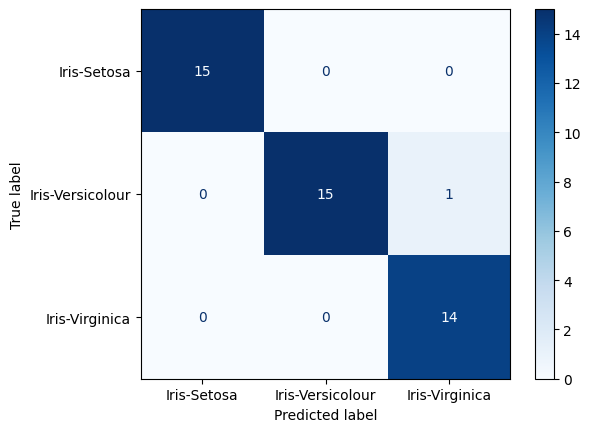

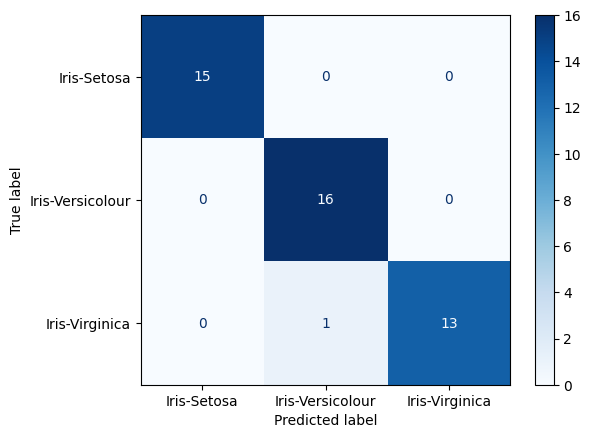

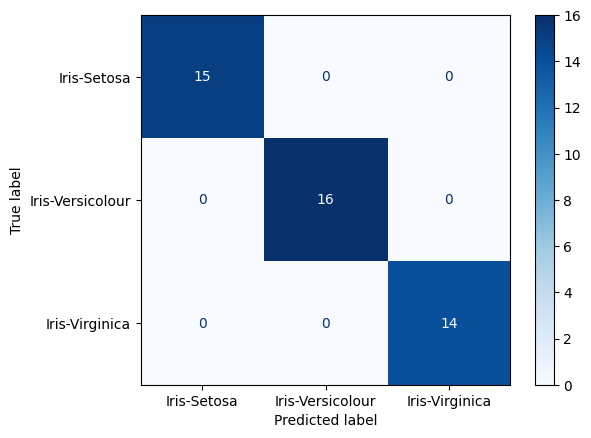

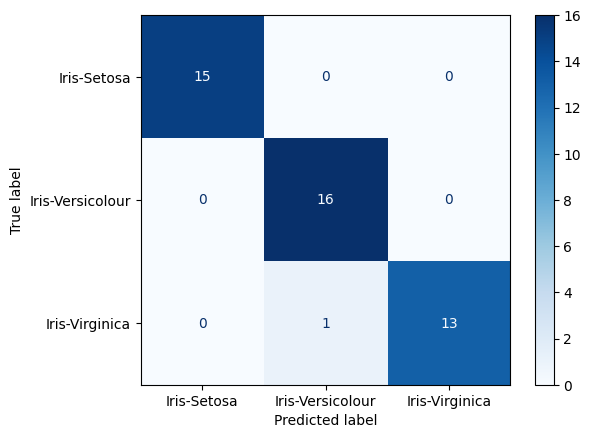

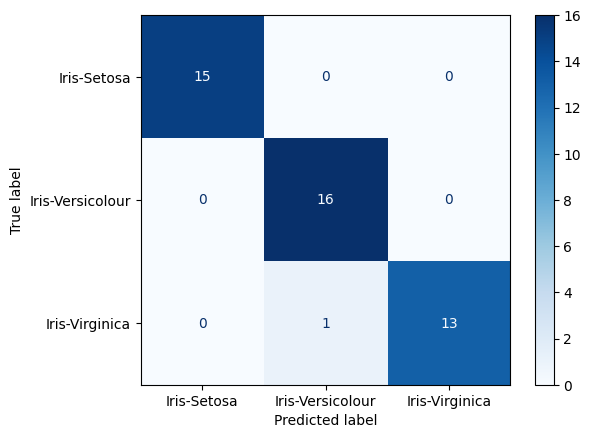

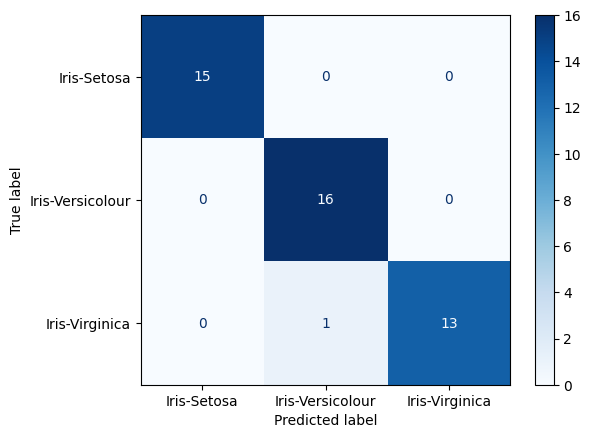

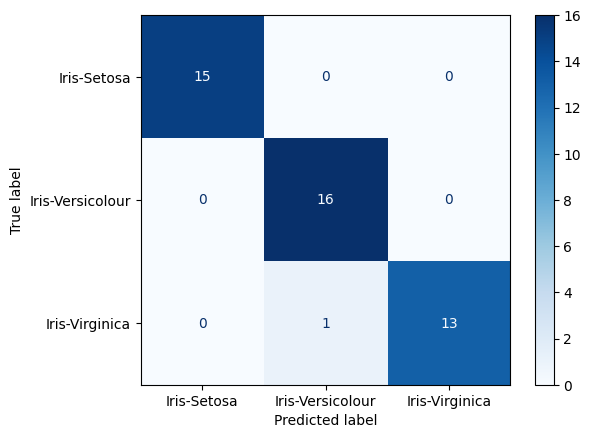

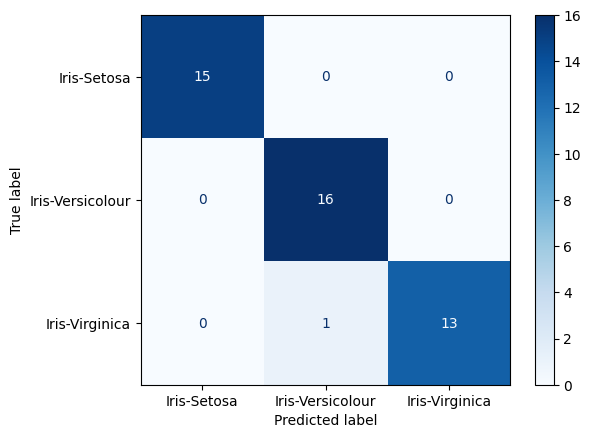

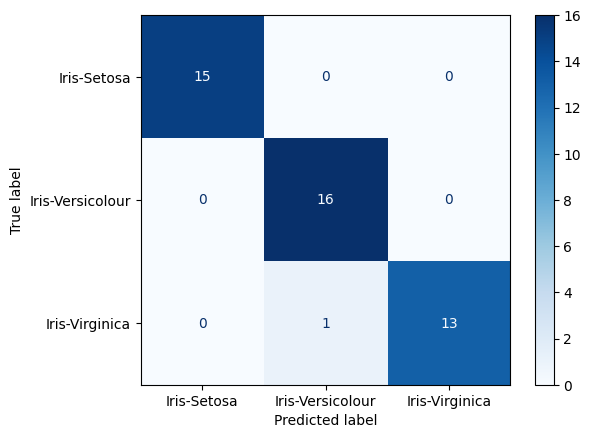

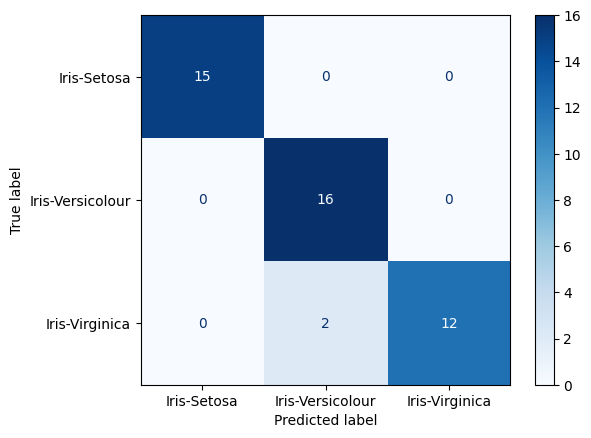

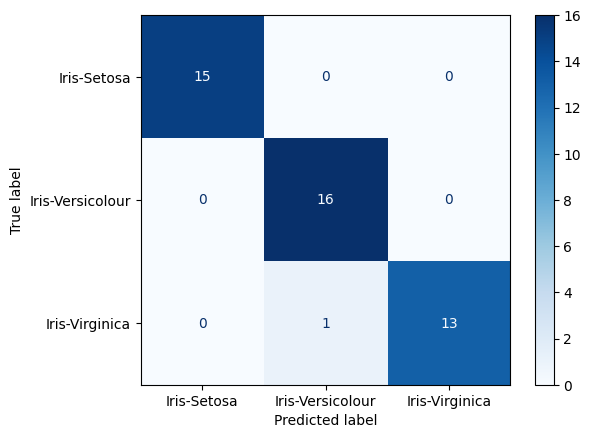

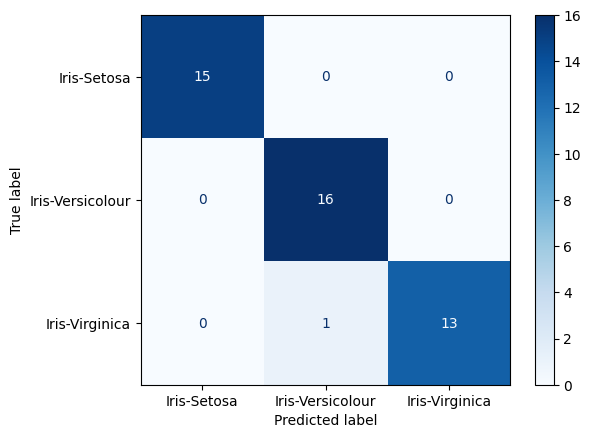

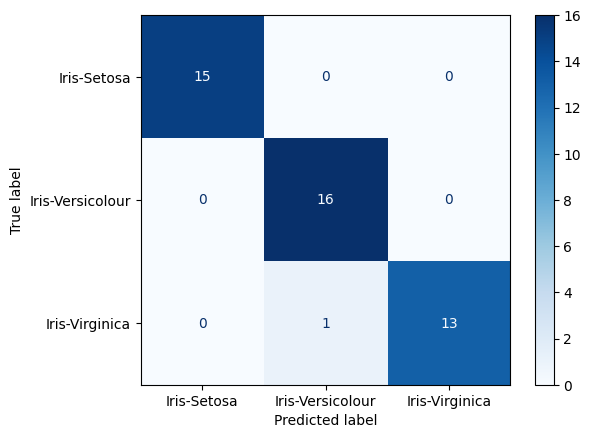

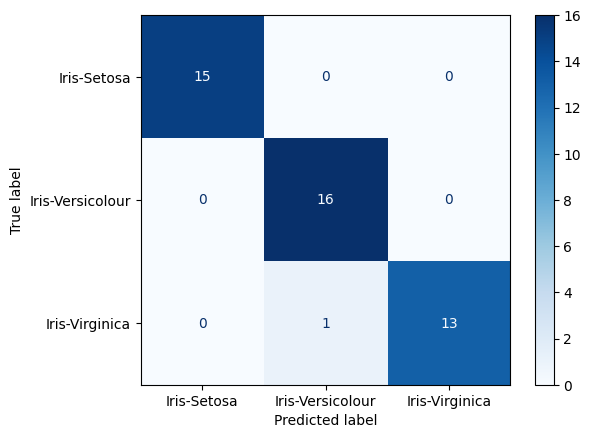

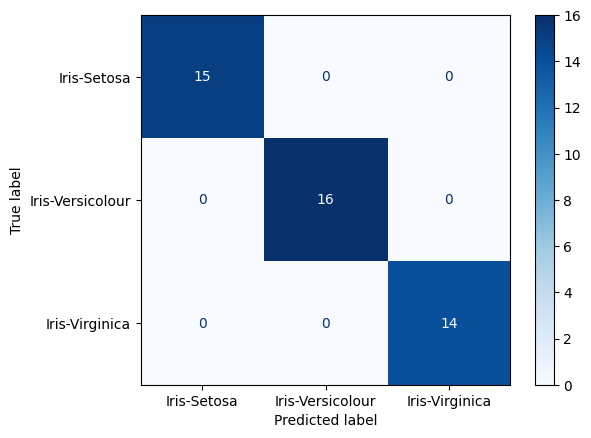

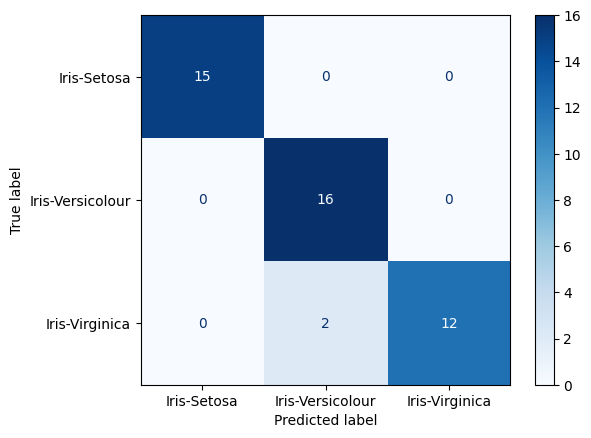

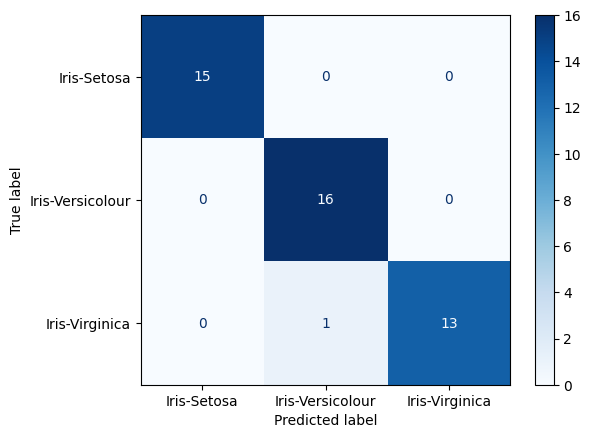

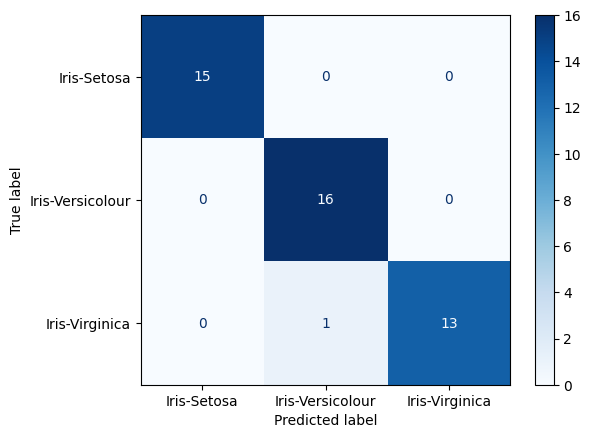

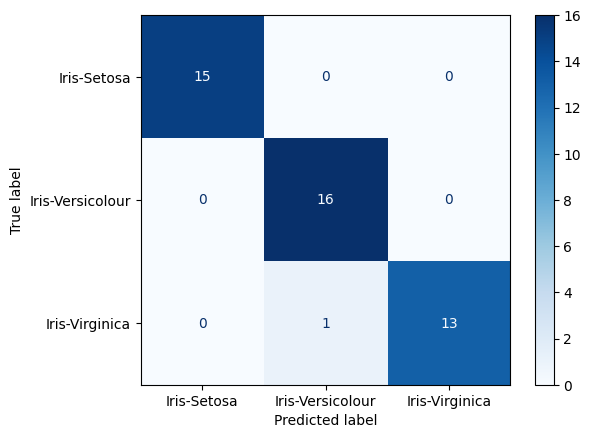

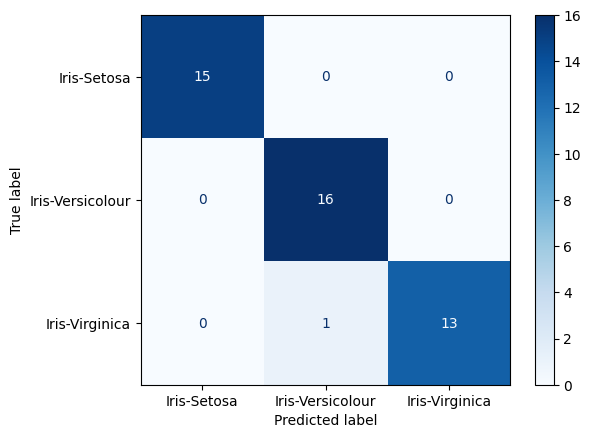

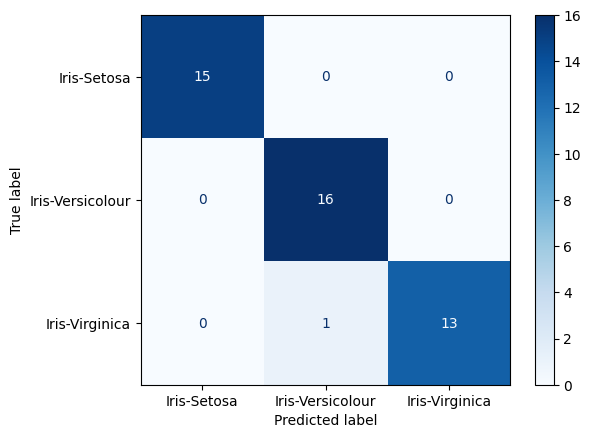

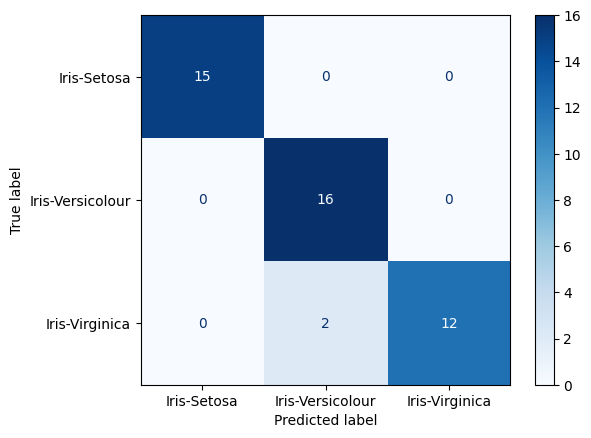

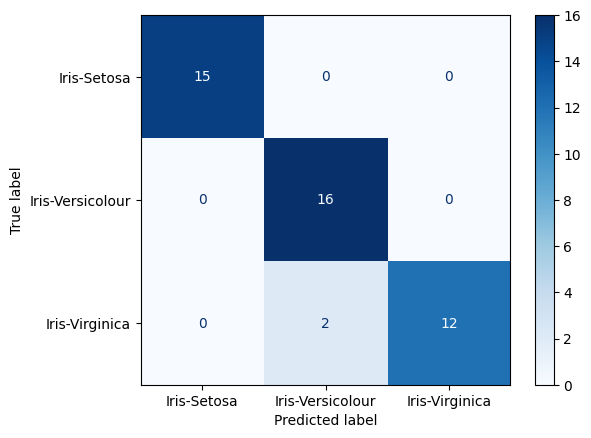

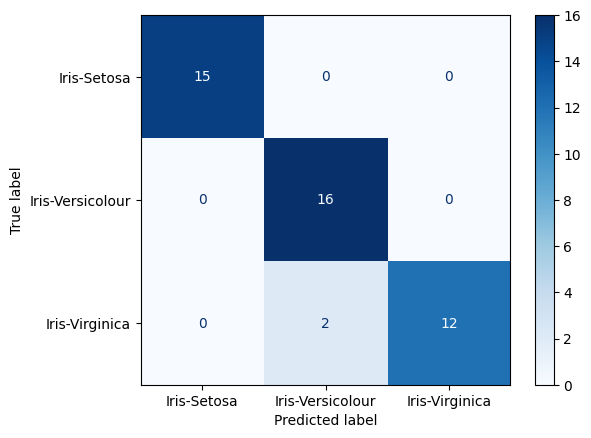

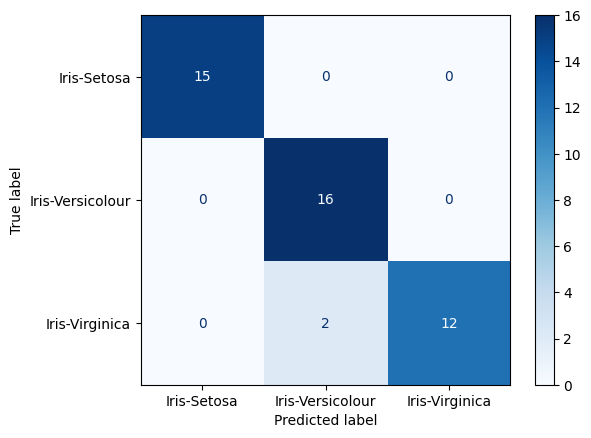

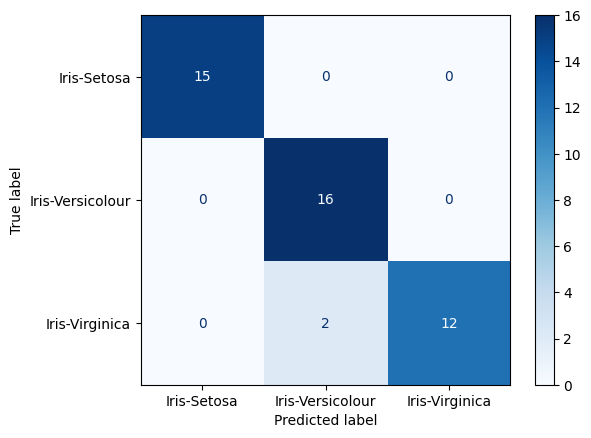

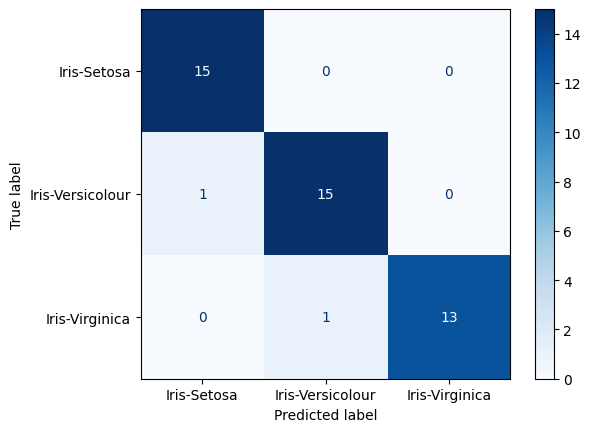

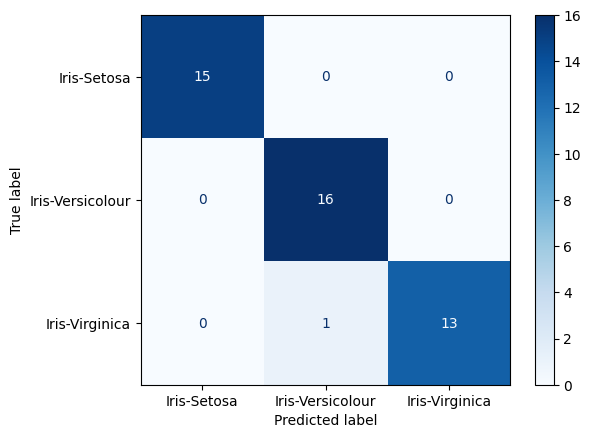

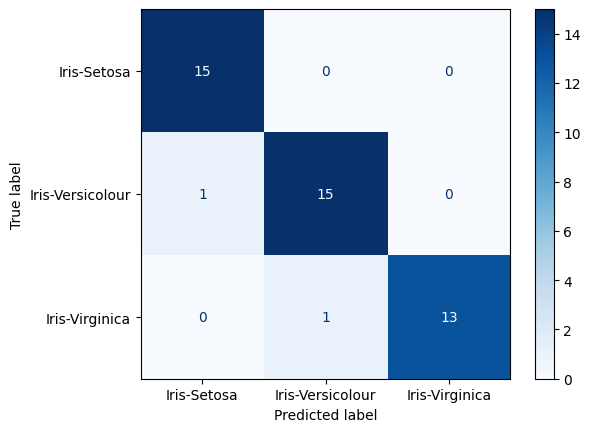

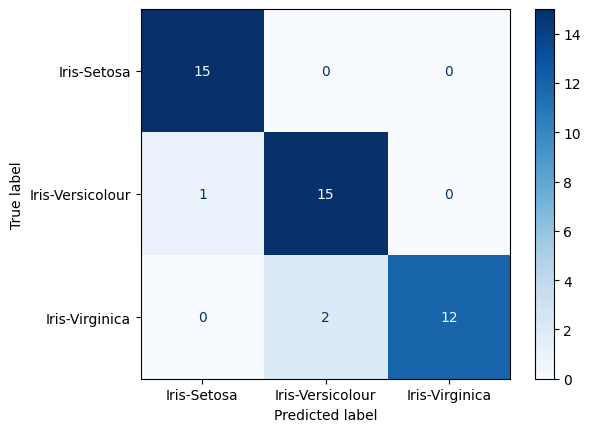

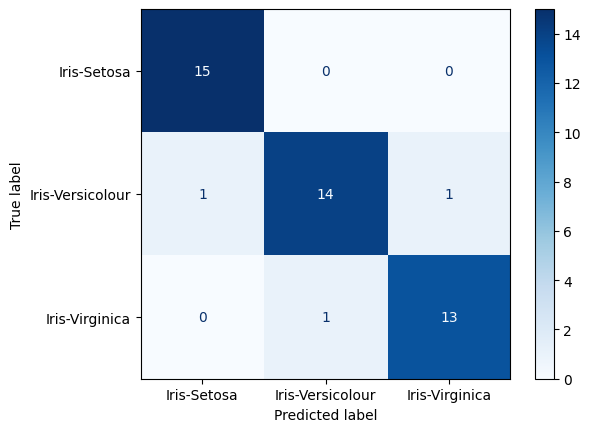

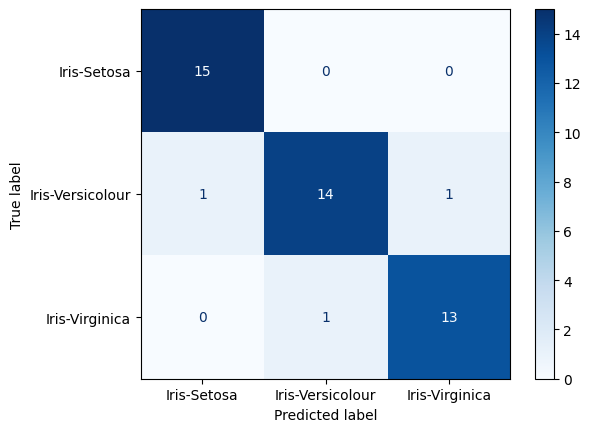

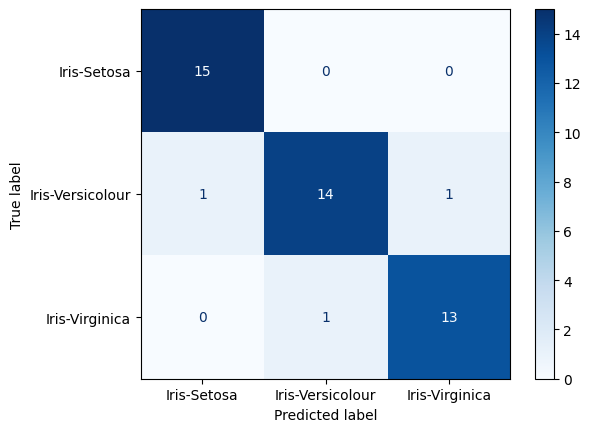

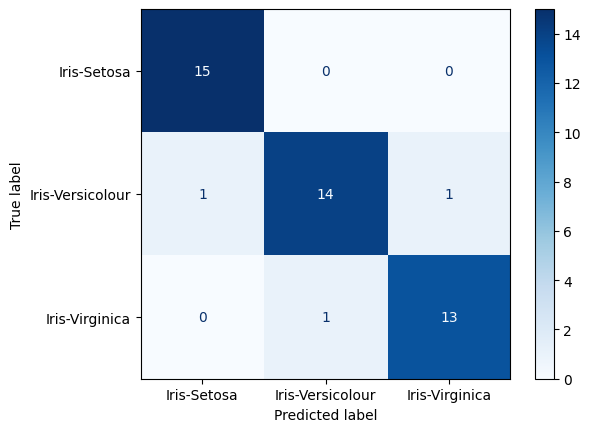

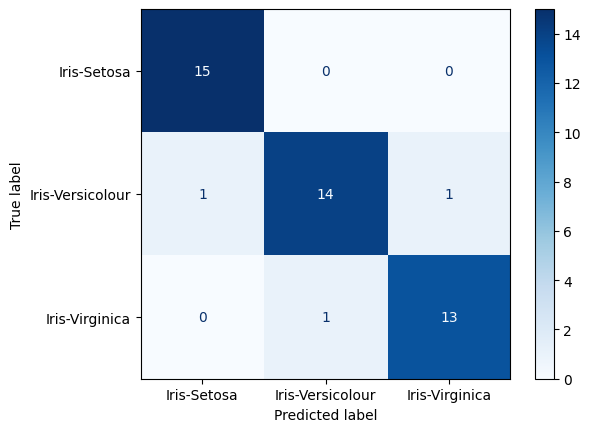

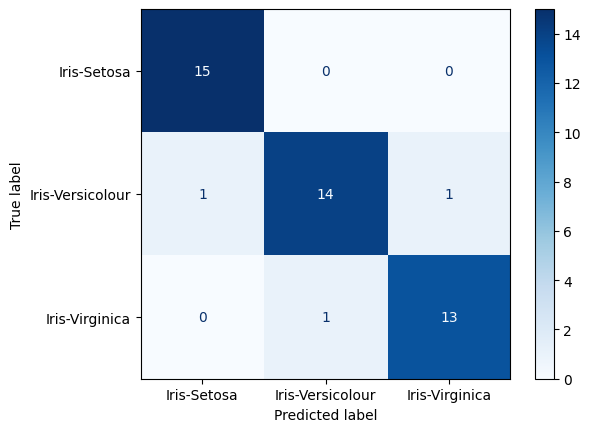

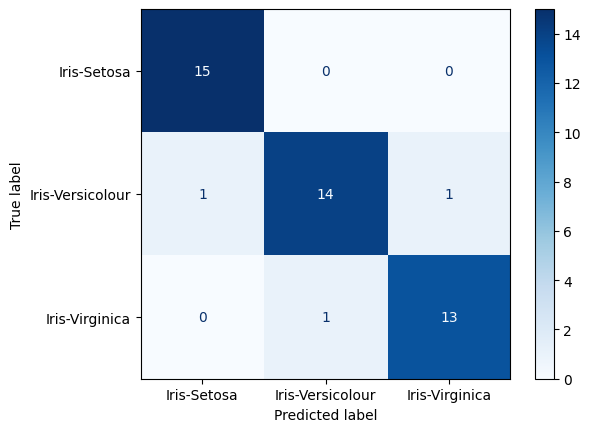

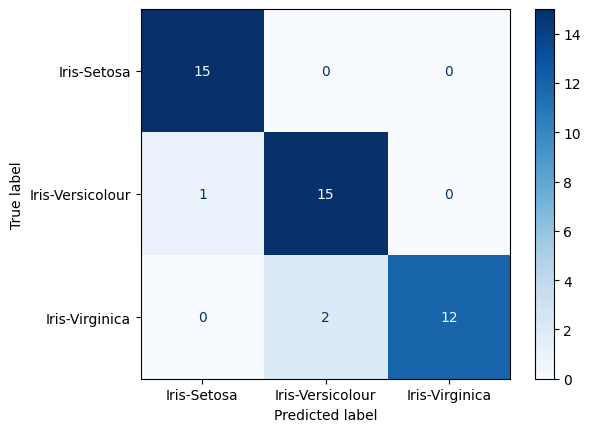

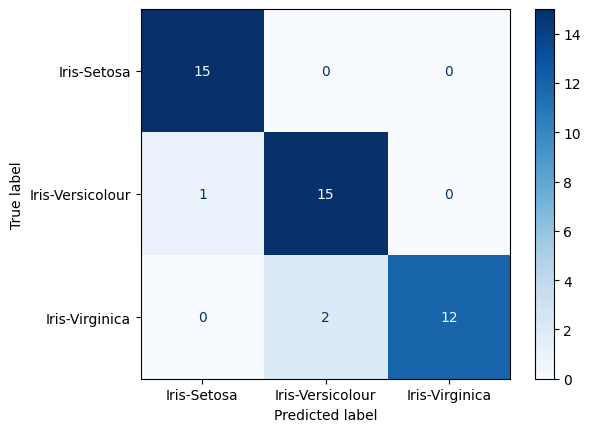

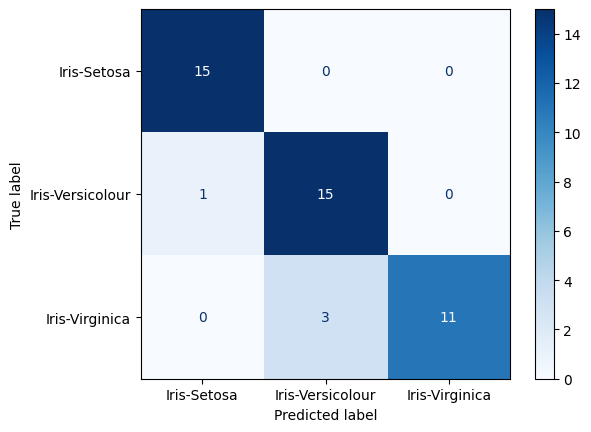

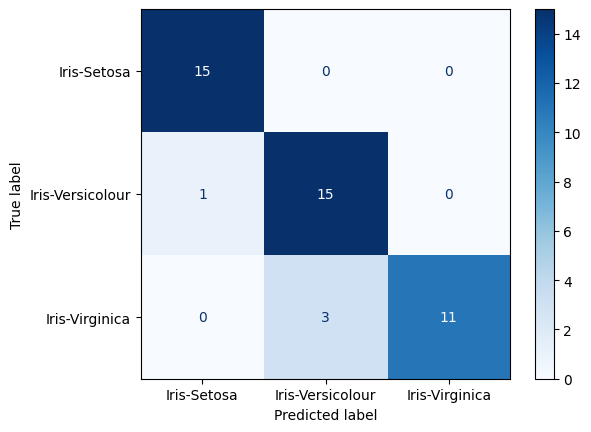

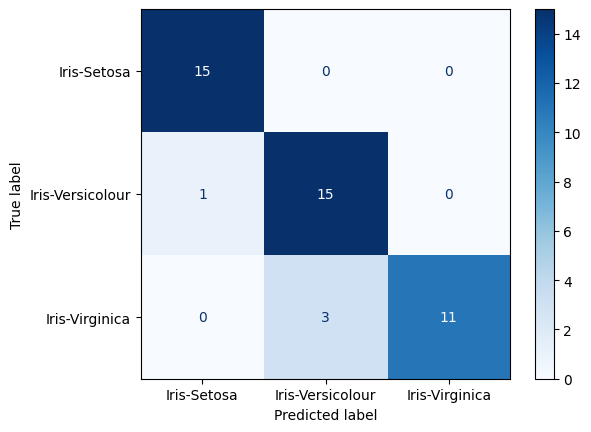

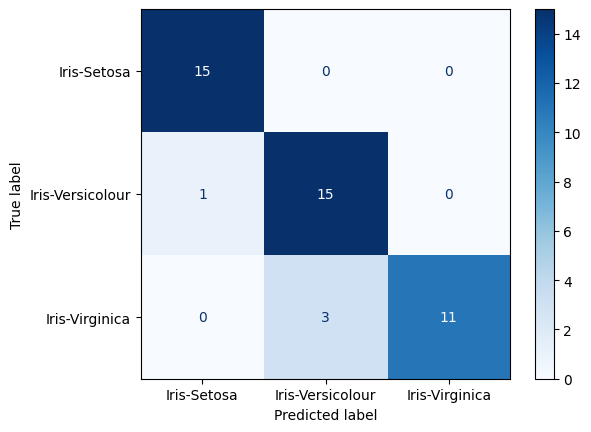

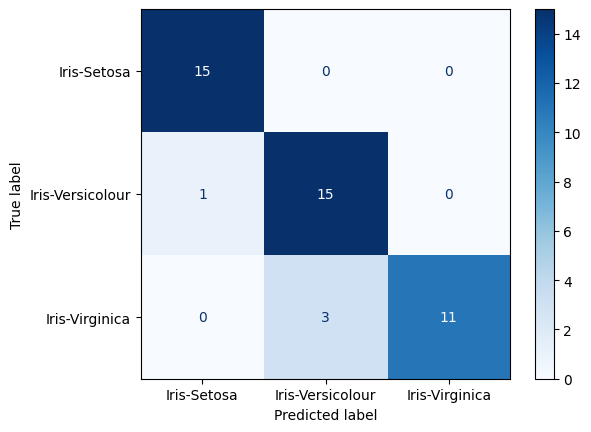

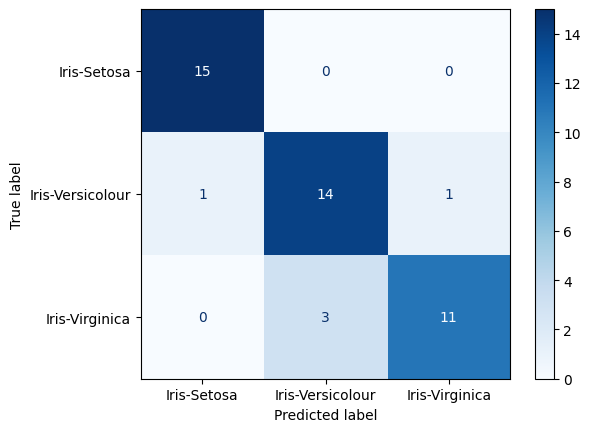

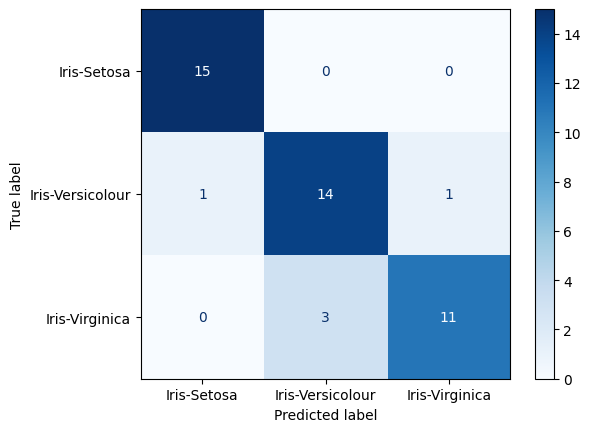

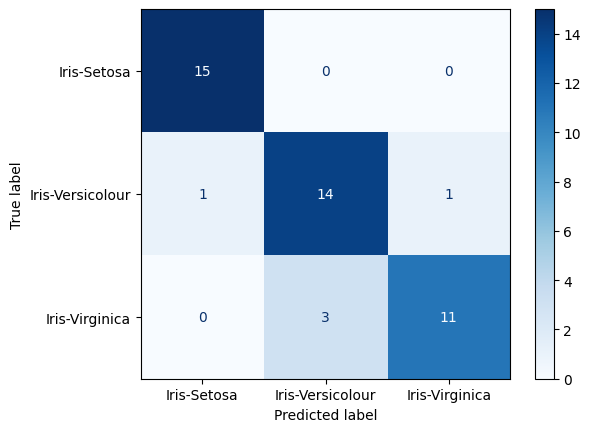

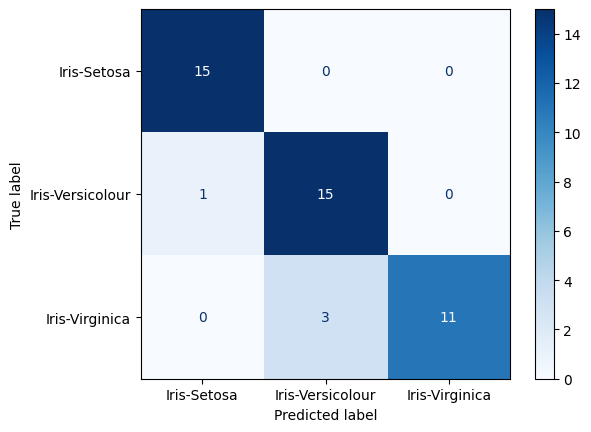

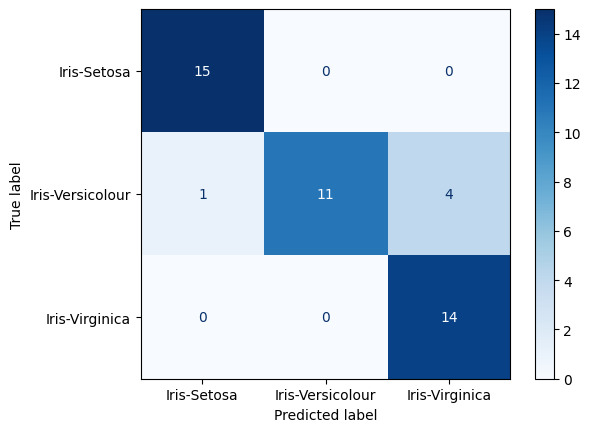

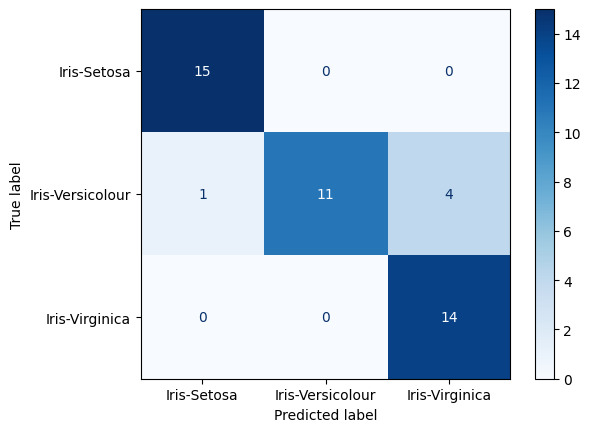

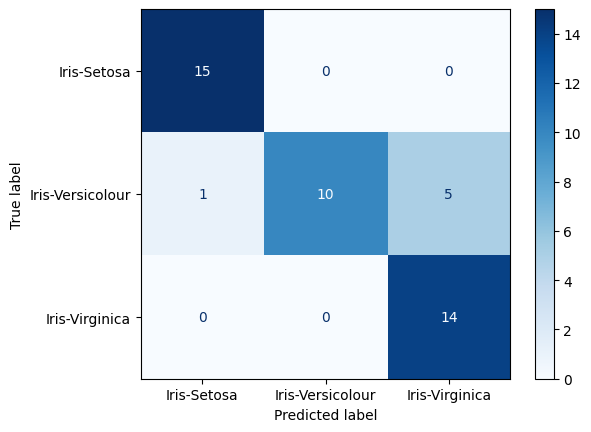

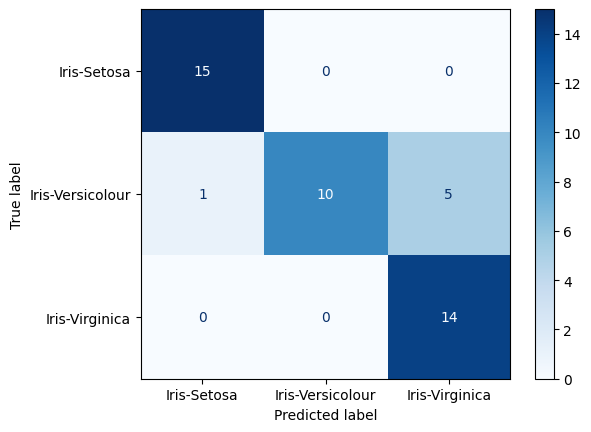

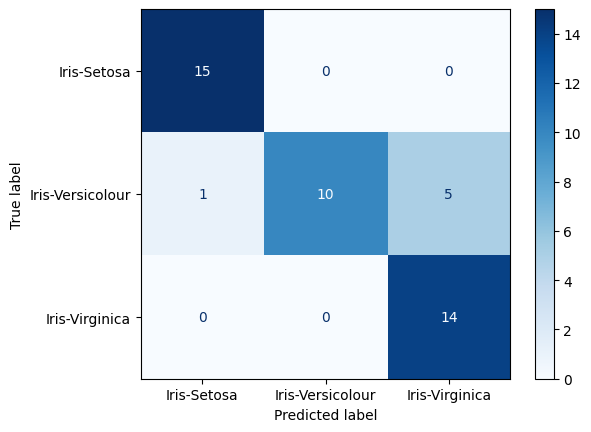

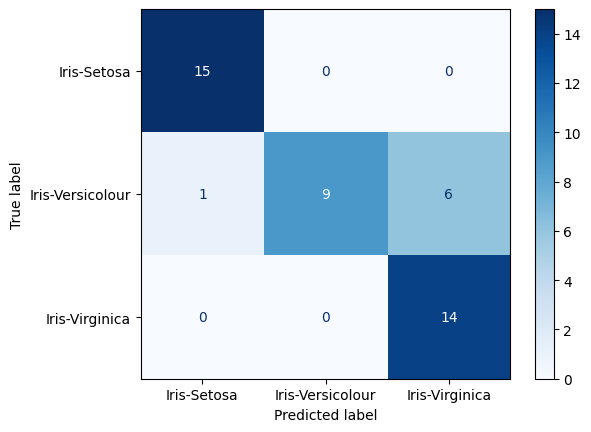

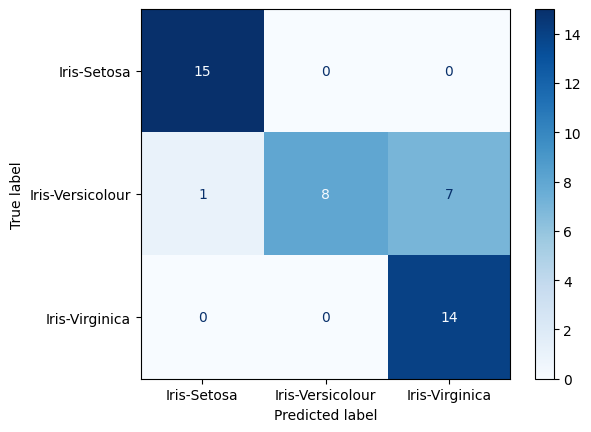

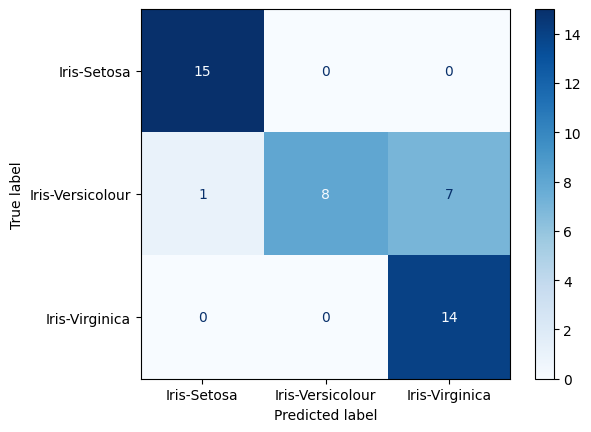

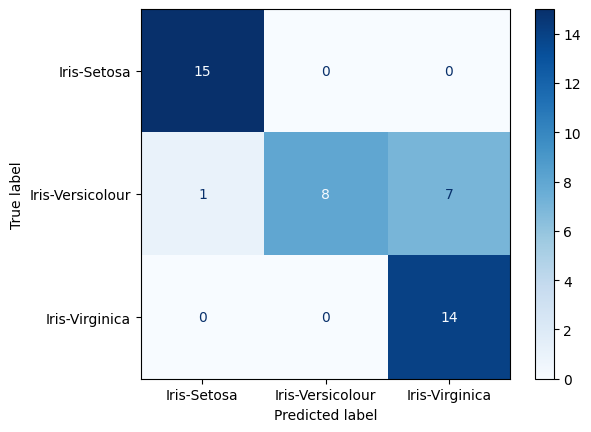

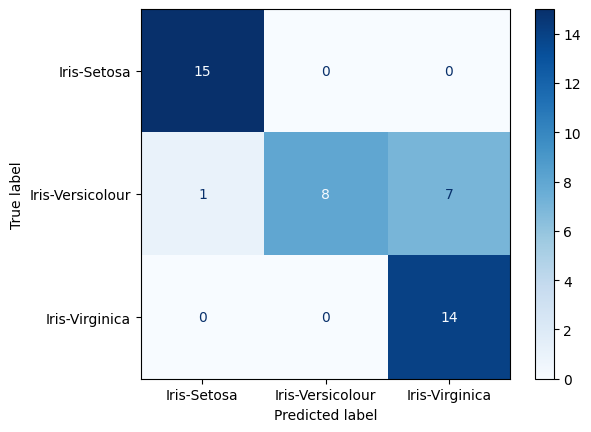

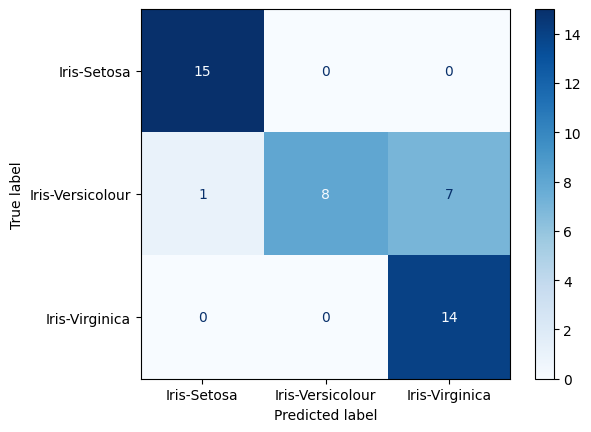

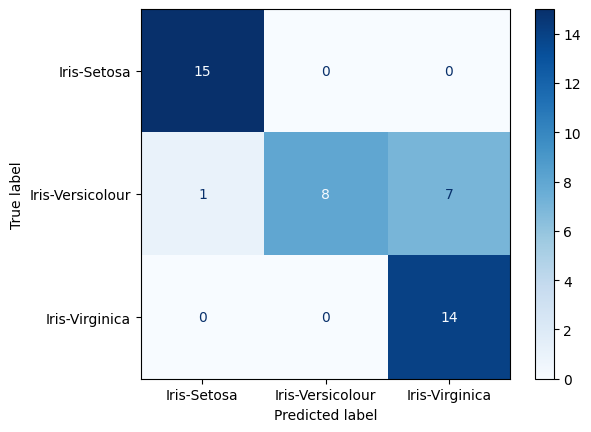

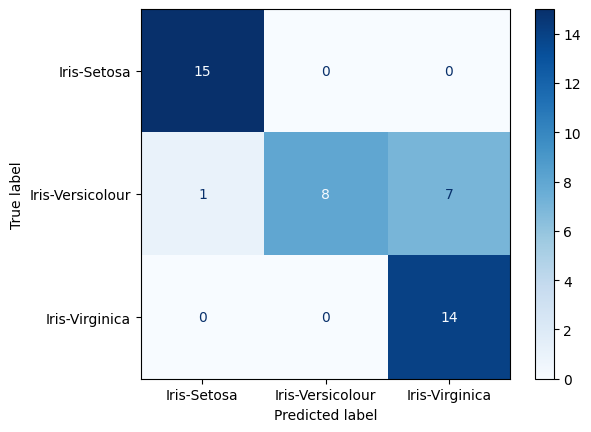

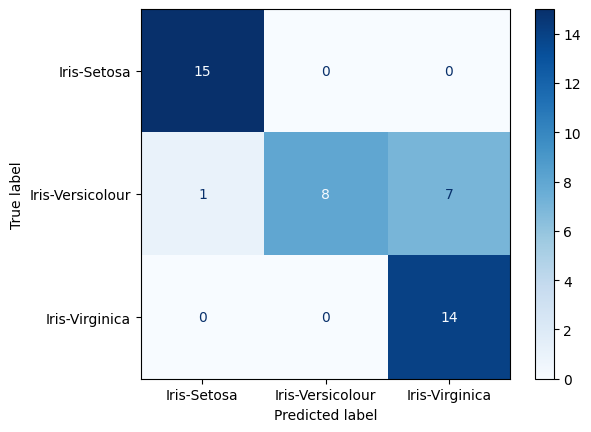

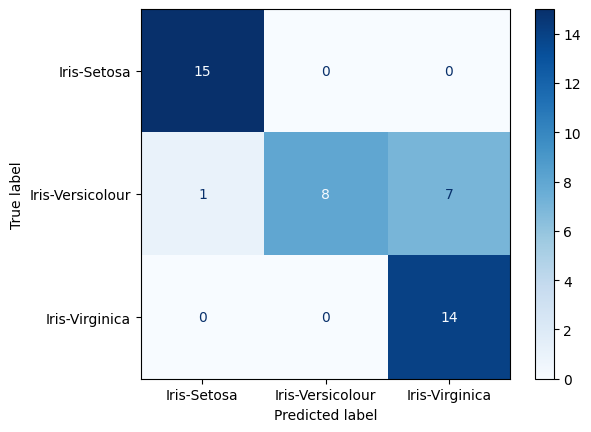

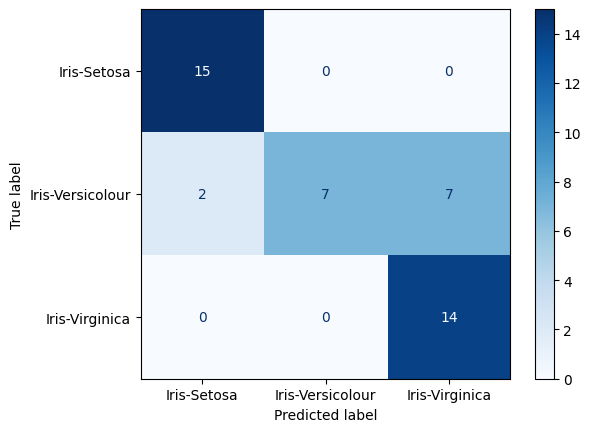

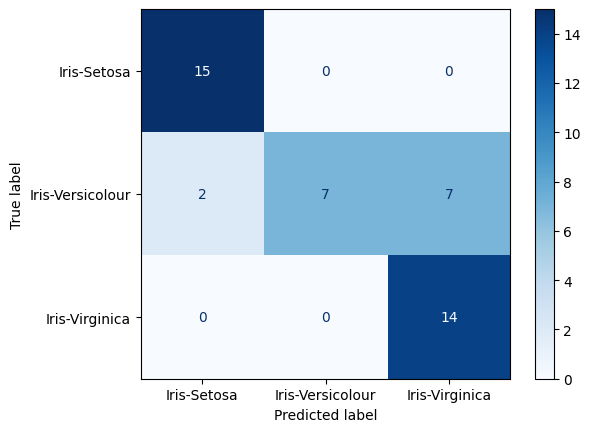

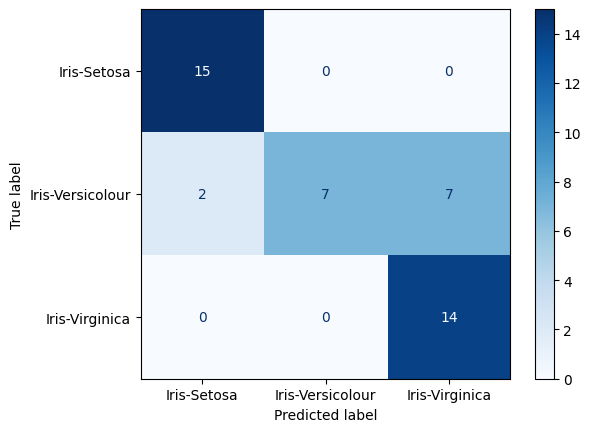

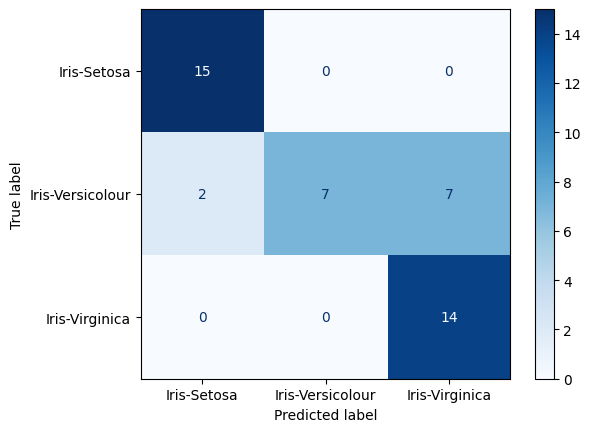

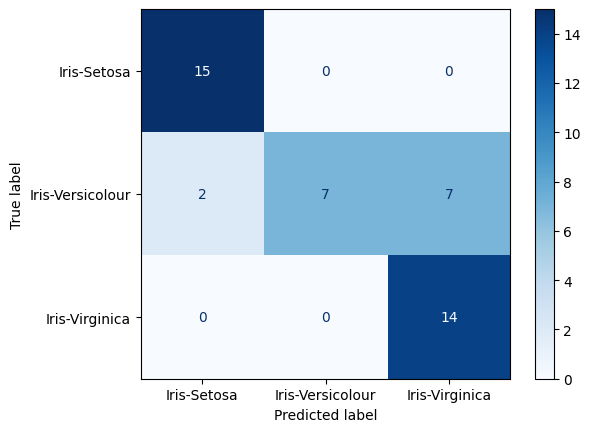

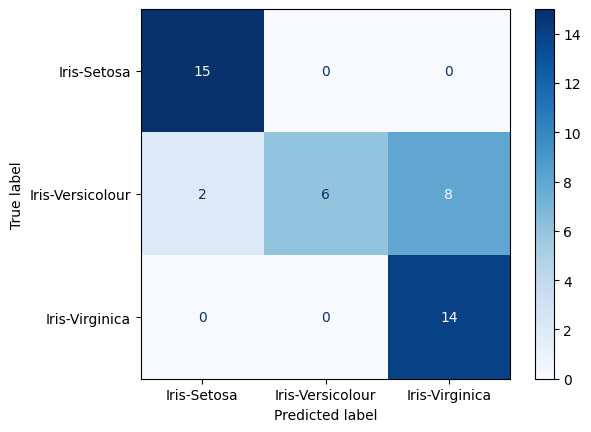

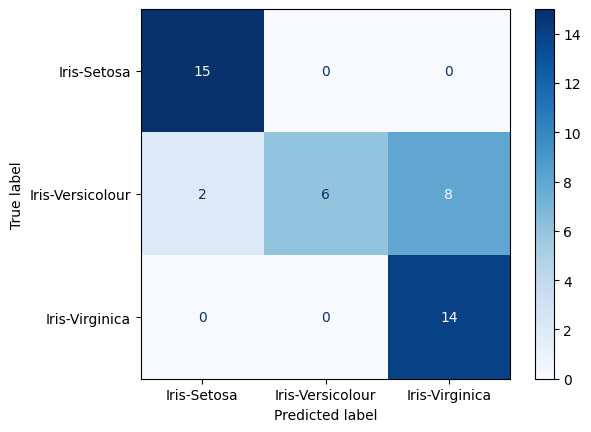

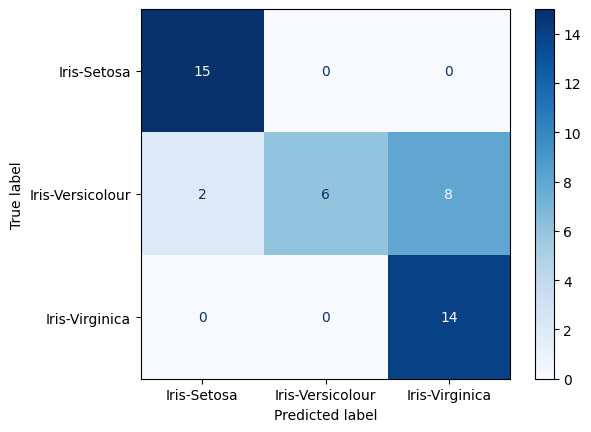

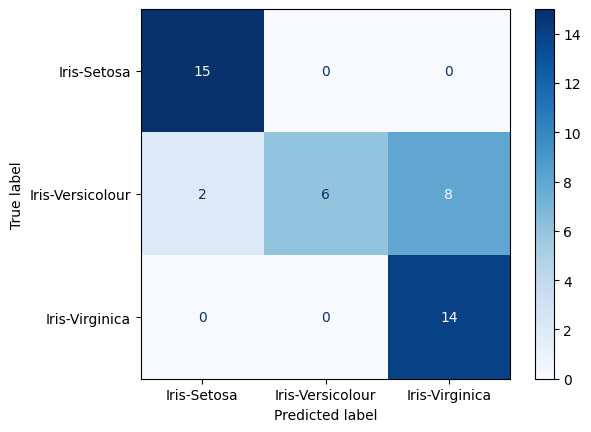

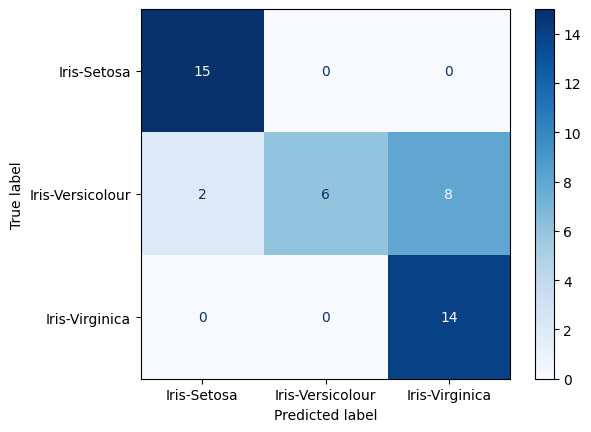

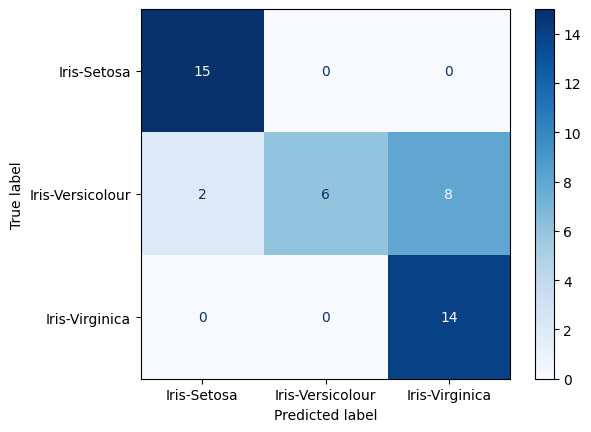

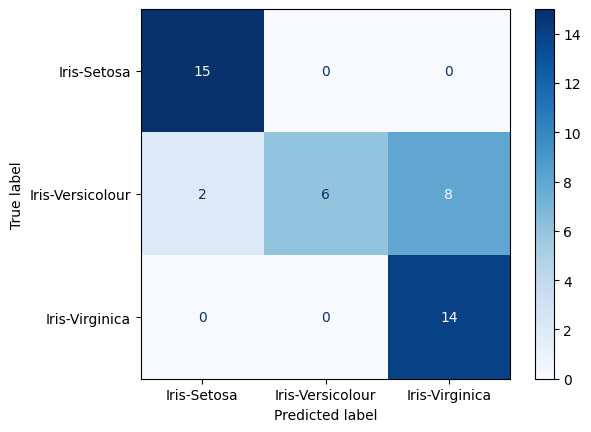

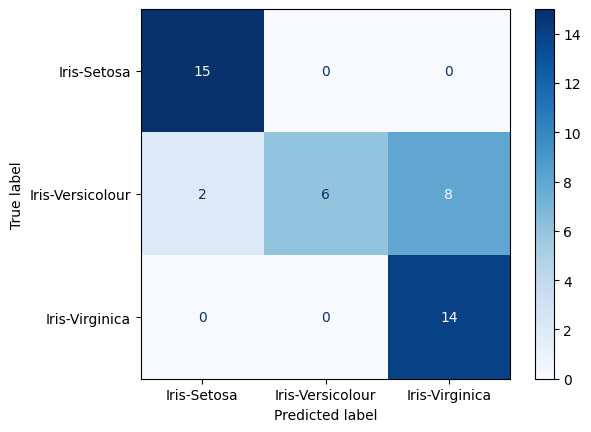

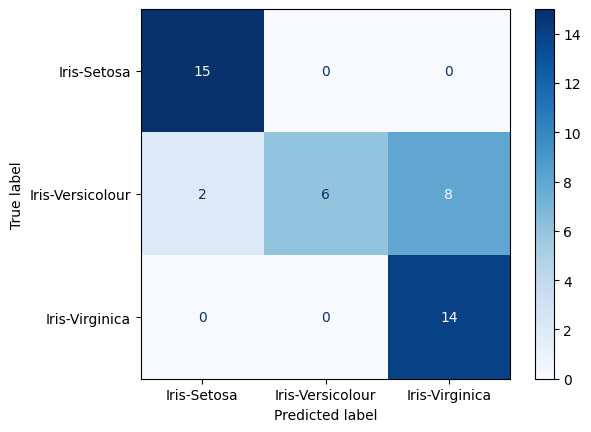

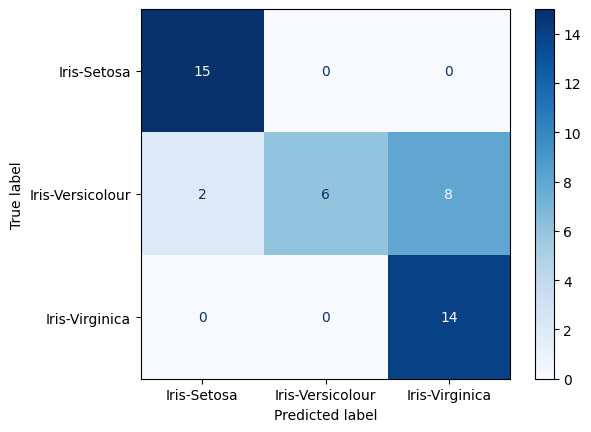

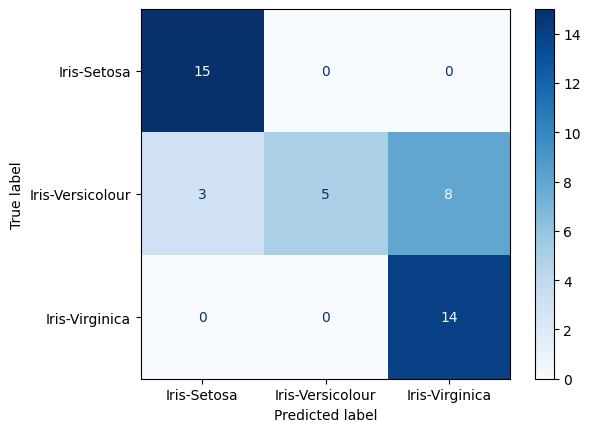

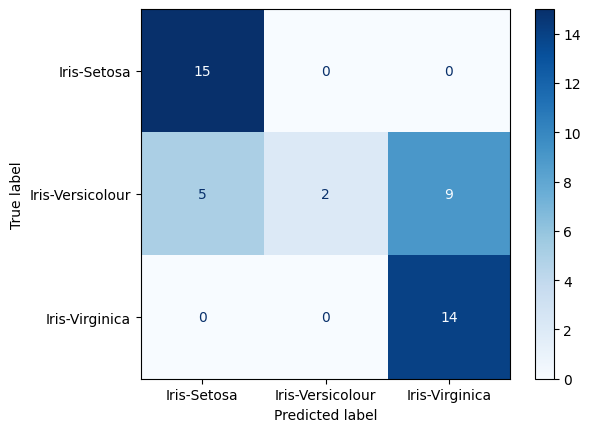

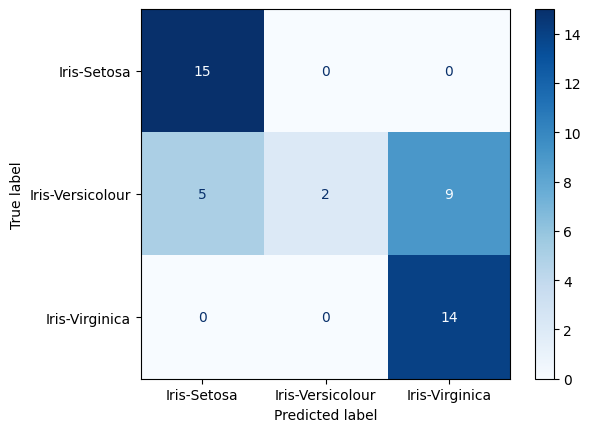

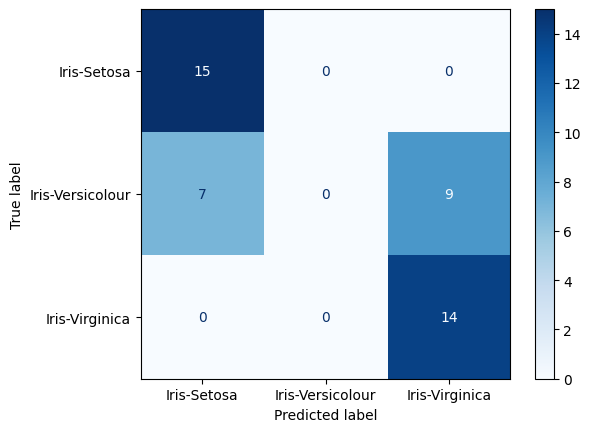

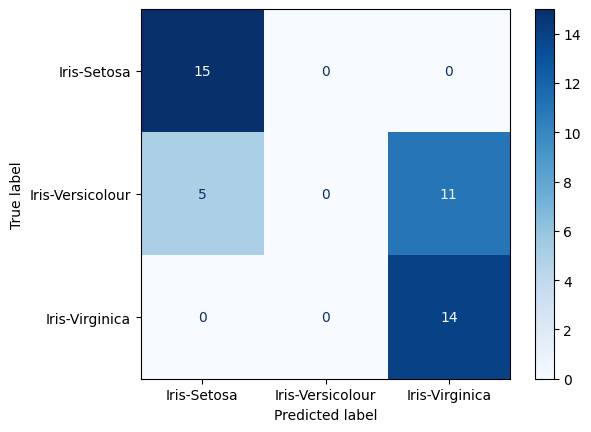

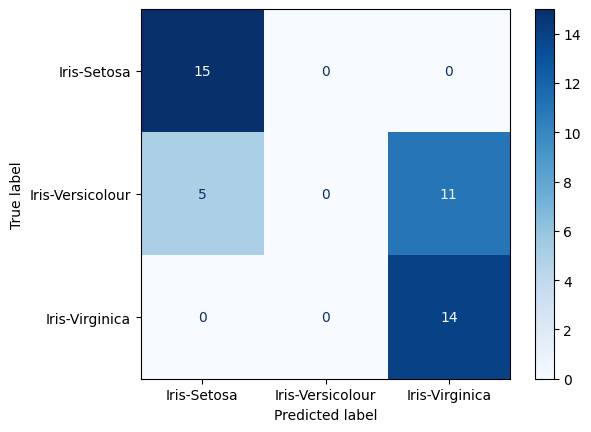

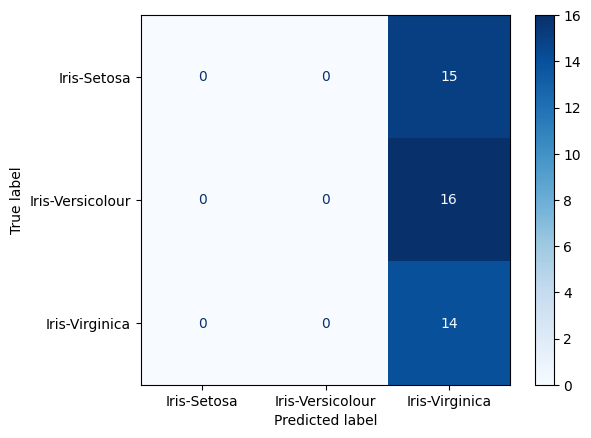

In [9]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# import the iris dataset
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=15)

# put X_train and y_train in a dataframe to display
df = pd.DataFrame(X_train, columns = ['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width'])
df = df.assign(Iris_label=y_train)
## Get iris types
iris_types = []
for y in y_train:
    if y == 0:
      iris_types.append('Setosa')
    elif y == 1:
      iris_types.append('Versicolour')
    else:
      iris_types.append('Virginica')
df = df.assign(iris_type=iris_types)

df.columns = ['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width', 'Iris Label', 'Iris Type']

# Functions to train knn and get predictions
def train_knn(n, X_train, y_train):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  return knn

def results_knn(knn, X_test, y_test):
  y_pred = knn.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  cm_display = ConfusionMatrixDisplay(cm, display_labels=['Iris-Setosa','Iris-Versicolour','Iris-Virginica']).plot(cmap=plt.cm.Blues)

  return y_pred, accuracy_score(y_test,y_pred), cm

# put X_train and y_train in a dataframe to display
df = pd.DataFrame(X_train, columns = ['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width'])
df = df.assign(Iris_label=y_train)
## Get iris types
iris_types = []
for y in y_train:
    if y == 0:
      iris_types.append('Setosa')
    elif y == 1:
      iris_types.append('Versicolour')
    else:
      iris_types.append('Virginica')
df = df.assign(iris_type=iris_types)

df.columns = ['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width', 'Iris Label', 'Iris Type']

# Train a KNN model
## Create model and find results
all_accuracies = []
for n in range(1,106):
  knn = train_knn(n,X_train,y_train)
  results, results_accuracy, cm = results_knn(knn,X_test,y_test)
  all_accuracies.append(results_accuracy)


In [10]:
# save all accuracies to a csv file
df = pd.DataFrame(all_accuracies, columns=['Accuracy'])
df.to_csv('./pages/knn_results.csv',index=False)

In [12]:
df.head()

,Accuracy
0,0.977778
1,0.955556
2,0.977778
3,0.955556
4,0.977778


In [7]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Iris Label,Iris Type
0,6.0,3.0,4.8,1.8,2,Virginica
1,4.4,2.9,1.4,0.2,0,Setosa
2,5.4,3.0,4.5,1.5,1,Versicolour
3,5.5,3.5,1.3,0.2,0,Setosa
4,6.7,3.3,5.7,2.1,2,Virginica


In [8]:
# save df.head() to ./pages/KNN_images/df_head.txt without index
with open('./pages/KNN_images/df_head.txt', 'w') as f:
    f.write(df.head().to_string(index=False))

In [15]:
# import the iris dataset
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# PCA function
pca = PCA(n_components=2, random_state=15)
pca.fit(X)
X_2D = pca.transform(X)

# Function to create kmeans plot
def kmeans_plot(kmeans, x, Y):
    label = []

    for i in range(len(X)):
        temp = ''
        cluster = kmeans.labels_[i]
        iris = Y[i]
        colors = 'rgbykmc'

        temp += colors[cluster]

        if iris == 0:
            temp += 'o'
        elif iris == 1:
            temp += 'x'
        else:
            temp += '^'

        label.append(temp)

    fig2, ax2 = plt.subplots()
    fig2.set_figheight(8)
    fig2.set_figwidth(8)

    for l in list(set(label)):
        ax2.plot([x[j][0] for j in range(len(x)) if label[j]==l],[x[j][1] for j in range(len(x)) if label[j]==l], l)

    ax2.set_title(f'Dimensionality Reduction')
    ax2.set_xlabel(f'New Attribute 1')
    ax2.set_ylabel(f'New Attribute 2')

    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Iris-Setosa', markerfacecolor='k',markersize=10),
                    Line2D([0], [0], marker='X', color='w', label='Iris-Versicolour', markerfacecolor='k',markersize=10),
                    Line2D([0], [0], marker='^', color='w', label='Iris-Virginica', markerfacecolor='k',markersize=10)]

    ax2.legend(handles=legend_elements, loc='best')

    # Show the results without pca
    # Plot results
    fig1, ax1 = plt.subplots(3,2)
    fig1.set_figheight(15)
    fig1.set_figwidth(15)

    # Data Exploration
    ## Split X into four categories
    sepal_length = X[:,0]
    sepal_width = X[:,1]
    petal_length = X[:,2]
    petal_width = X[:,3]

    # Create combinations and labels 
    all= [sepal_length,sepal_width,petal_length,petal_width]
    label = ['Sepal Length','Sepal Width', 'Petal Length','Petal Width']
    combos = []
    labels = []
    for i in range(len(all)):
        for j in range(i+1,len(all)):
            combos.append((all[i],all[j]))
            labels.append((label[i],label[j]))

    for i in range(len(combos)):
        ax1=plt.subplot(321+int(i))
        x=combos[i][0]
        y=combos[i][1]
        xlabel=labels[i][0]
        ylabel=labels[i][1]
        for j in range(len(X)):
            cluster = kmeans.labels_[j]
            iris = Y[j]
            temp = ''
            temp += colors[cluster]
            if iris == 0:
                temp += 'o'
            elif iris == 1:
                temp += 'x'
            else:
                temp += '^'
            ax1.plot(x[j],y[j], temp)

        ax1.set_title(f'{xlabel} vs {ylabel}')
        ax1.set_xlabel(f'{xlabel} (cm)')
        ax1.set_ylabel(f'{ylabel} (cm)')
    
    ax2.legend(handles=legend_elements, loc='best')
                       
    return fig1, fig2

C:\Users\suqia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\suqia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

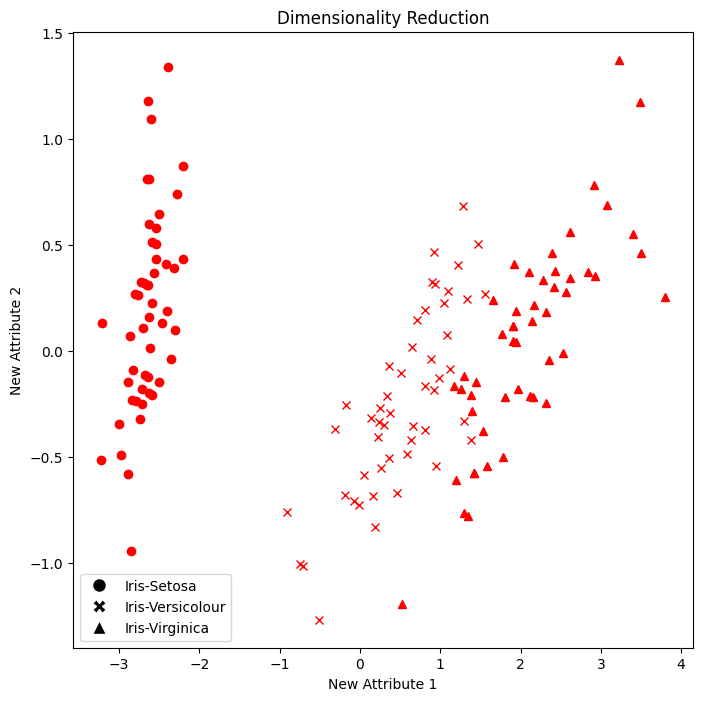

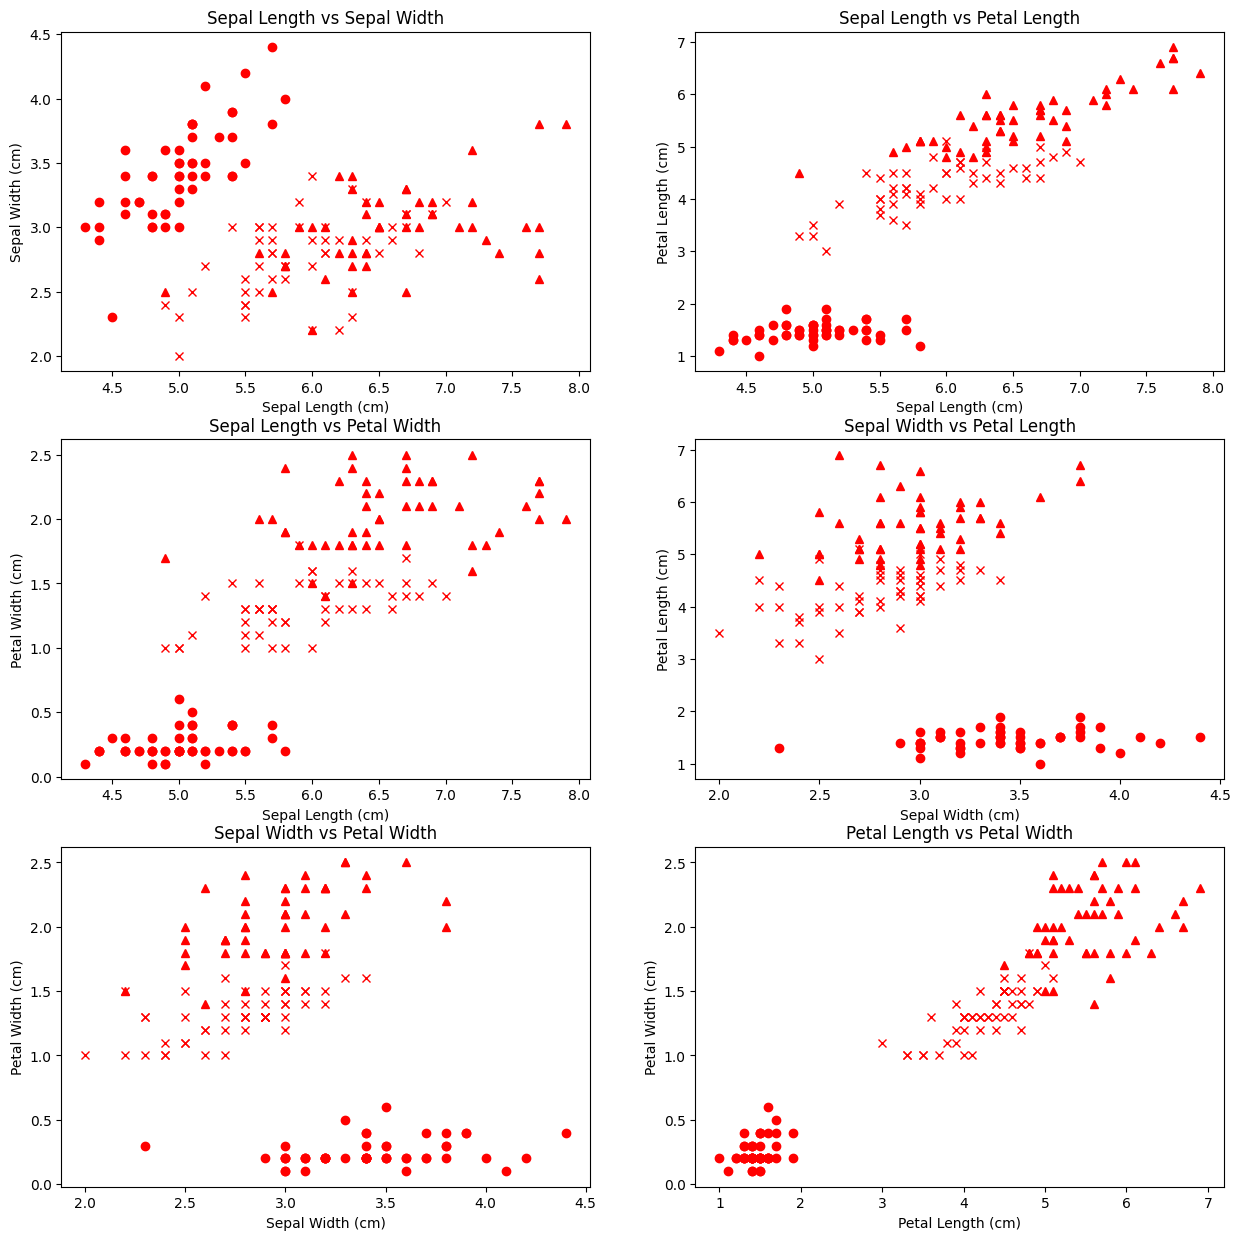

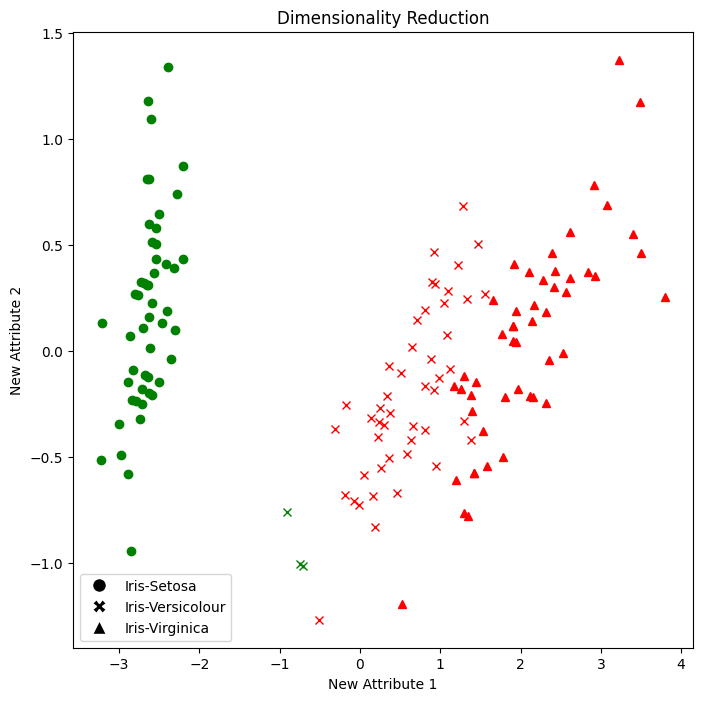

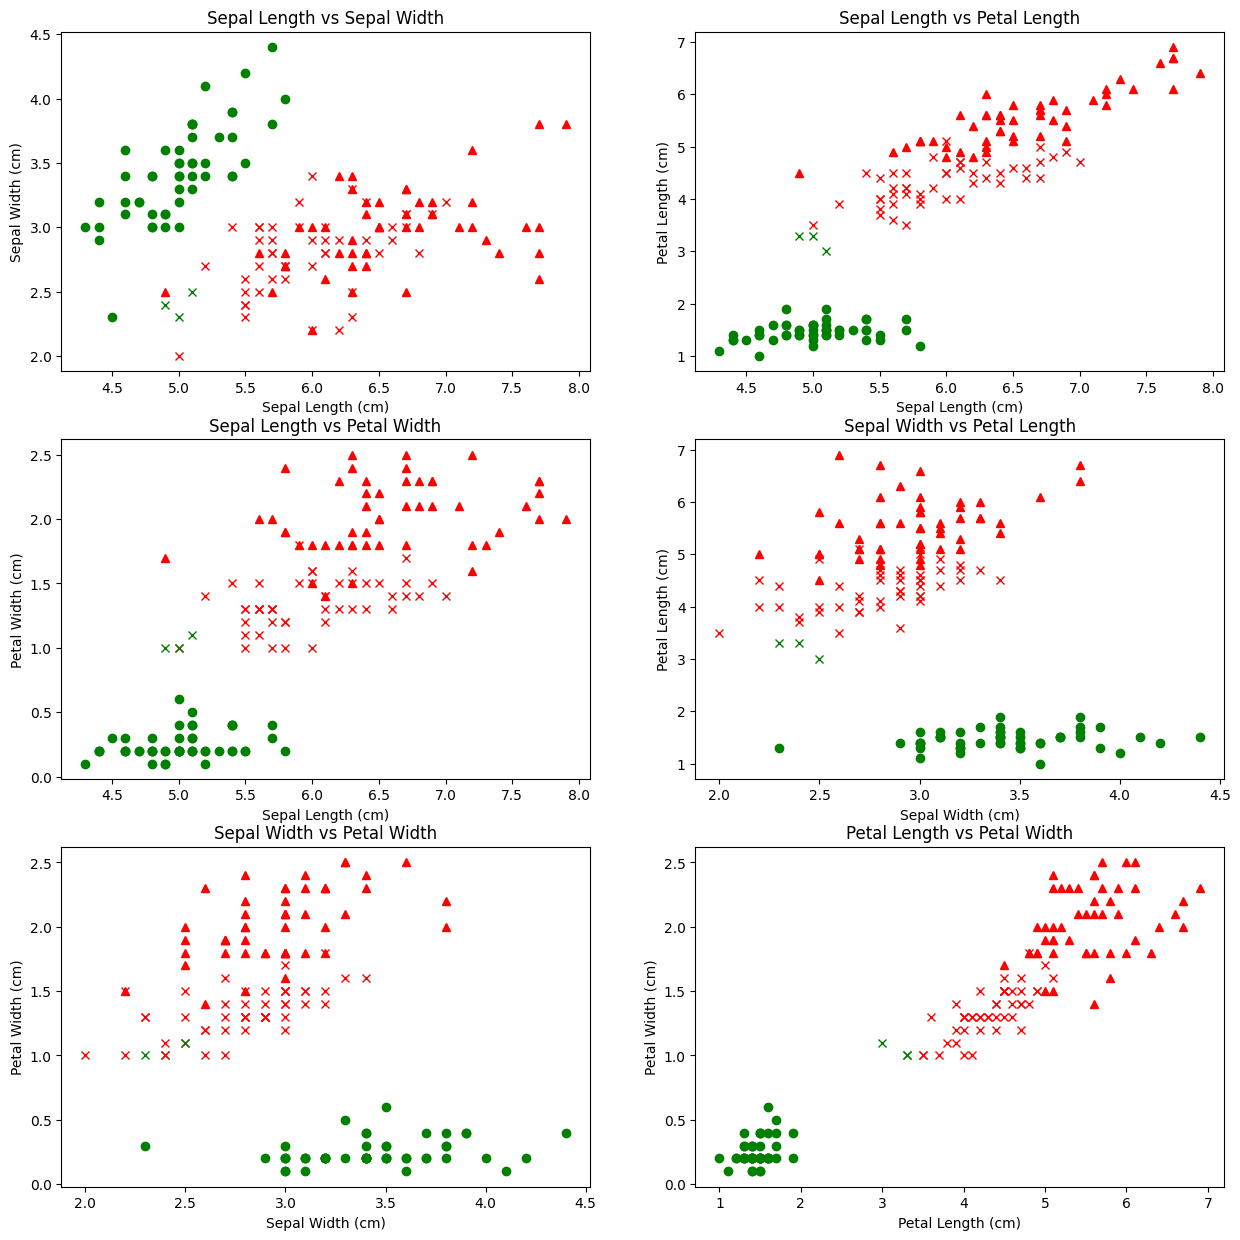

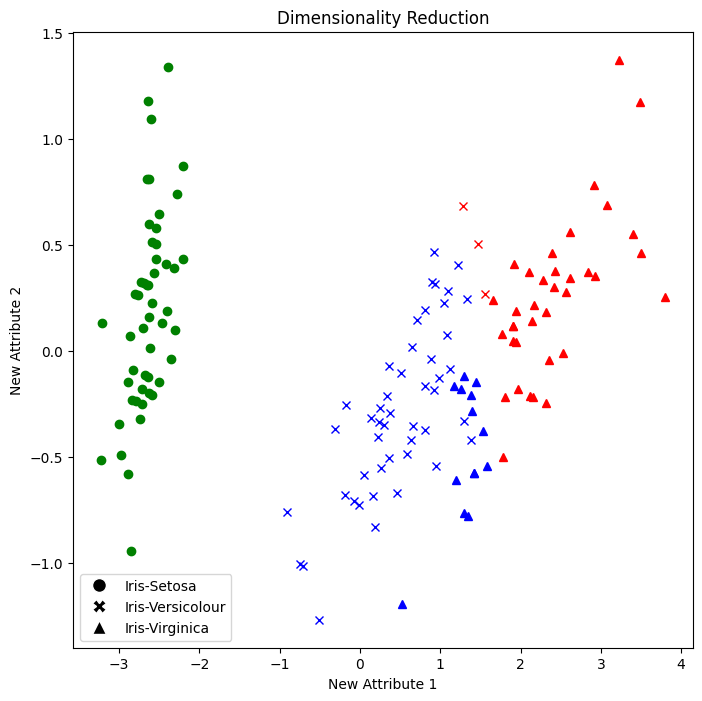

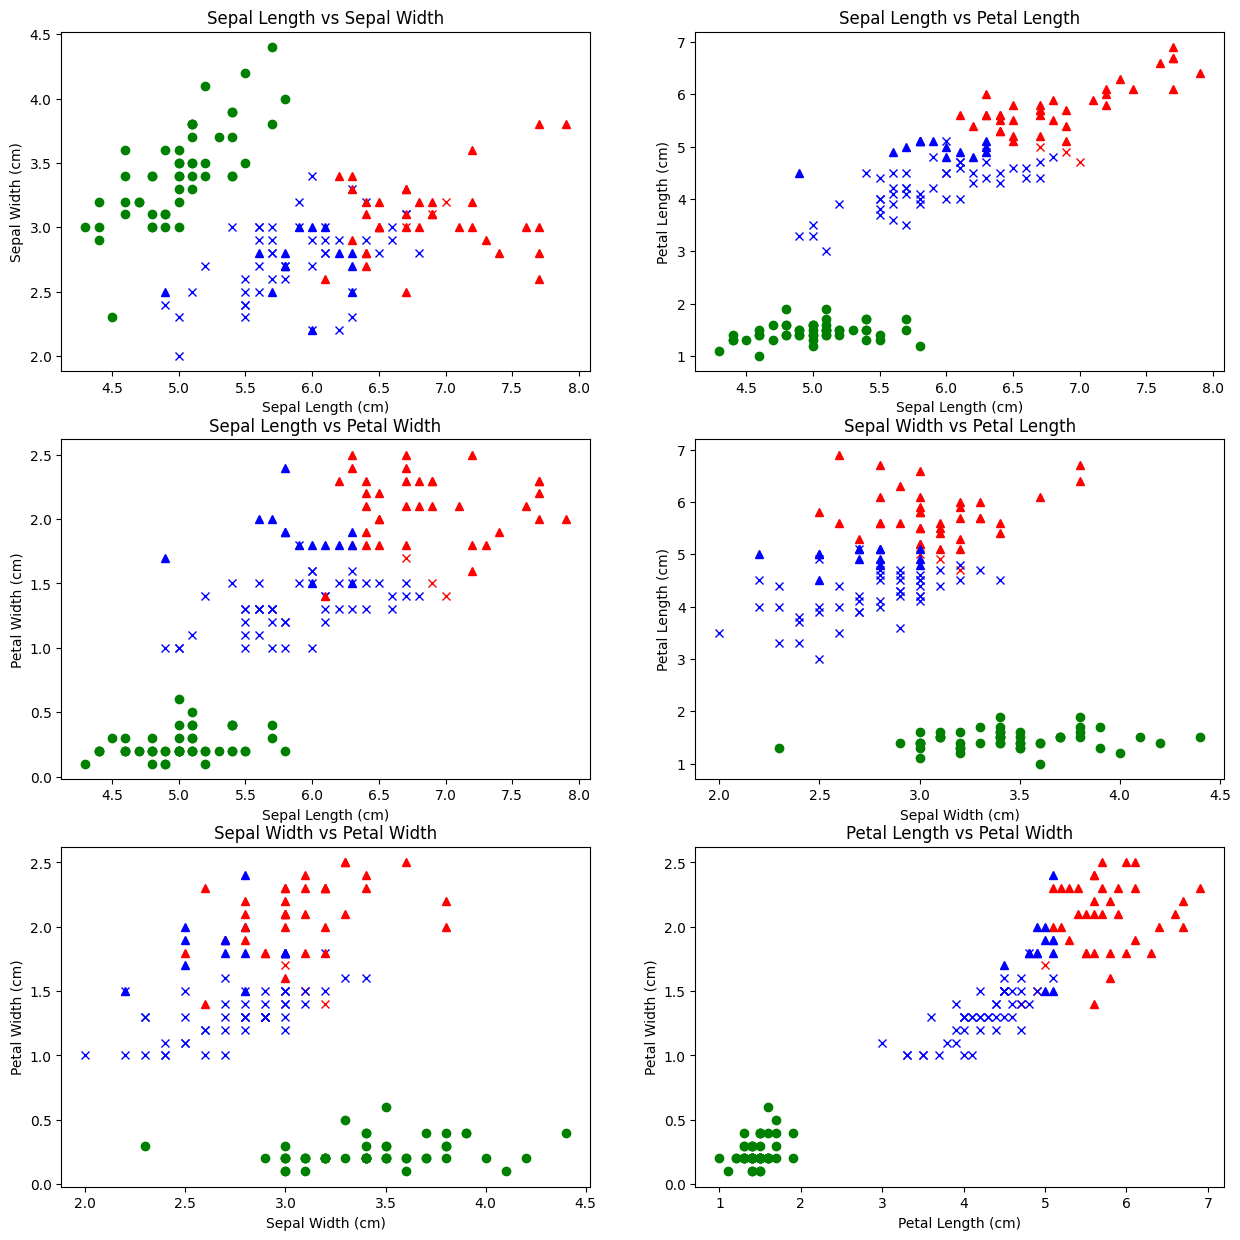

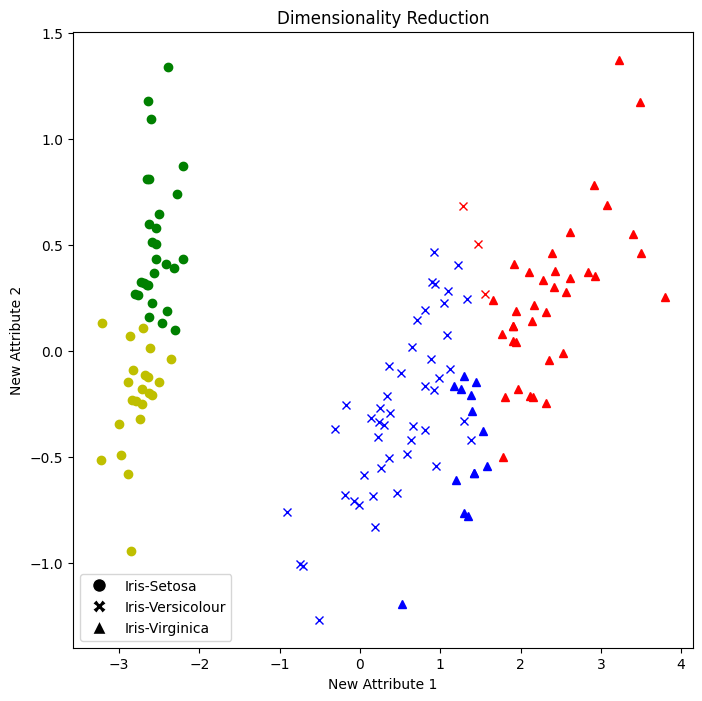

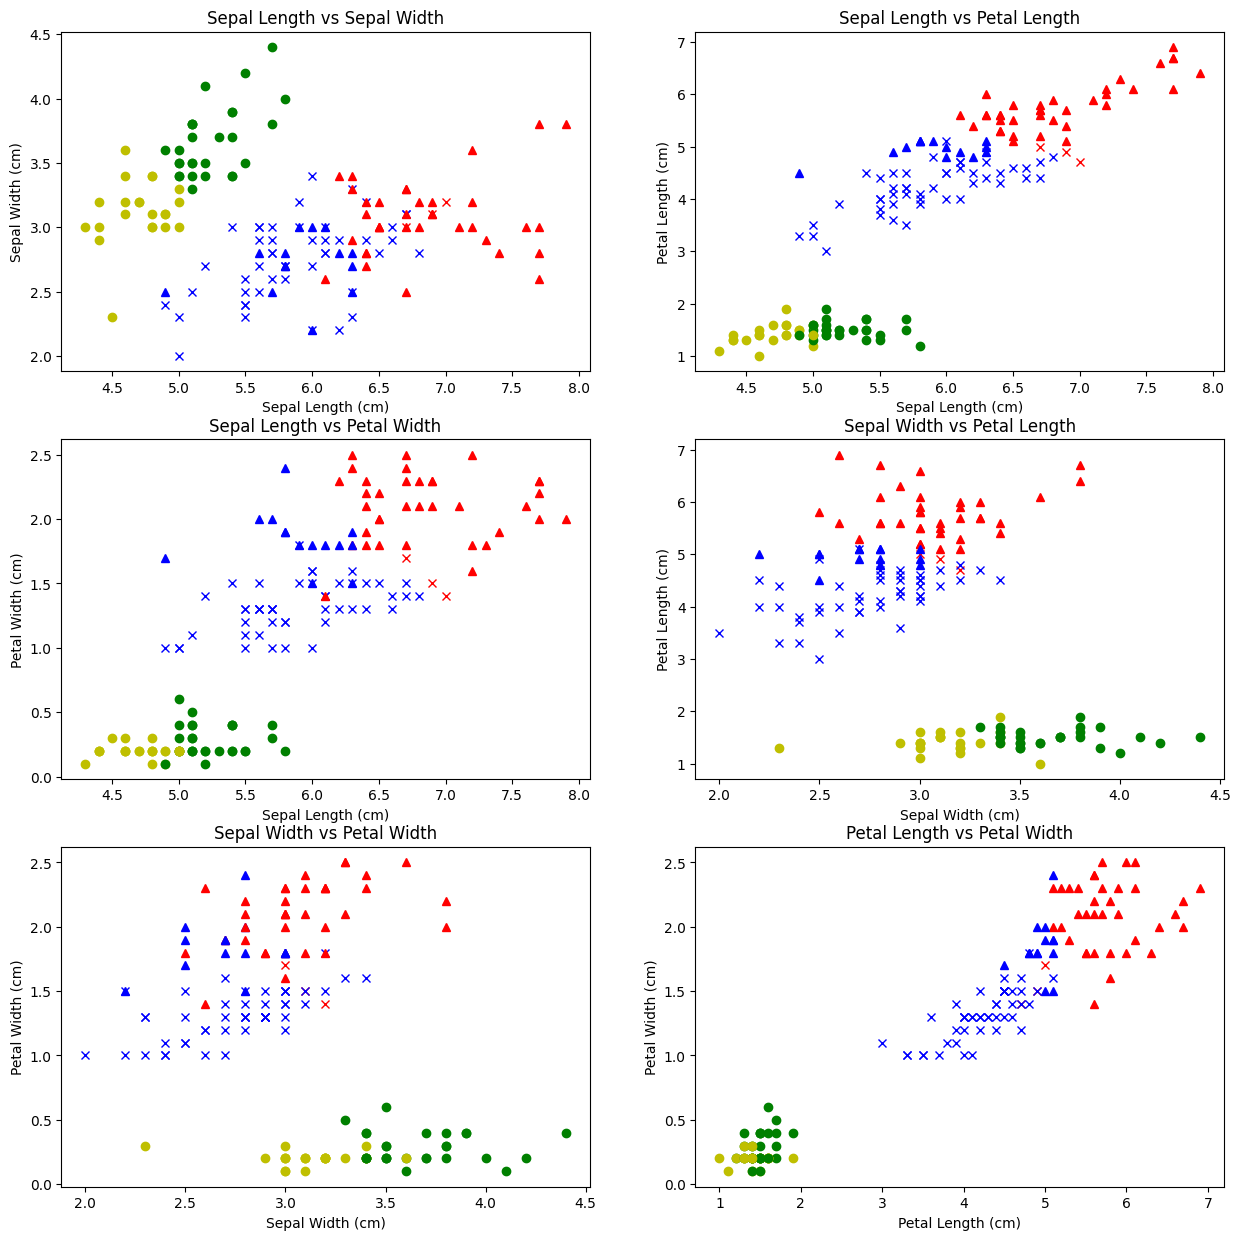

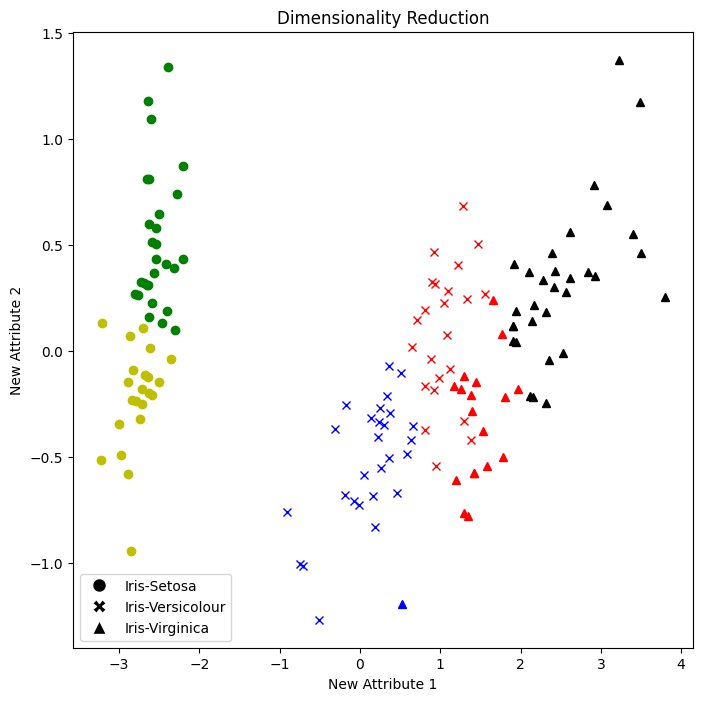

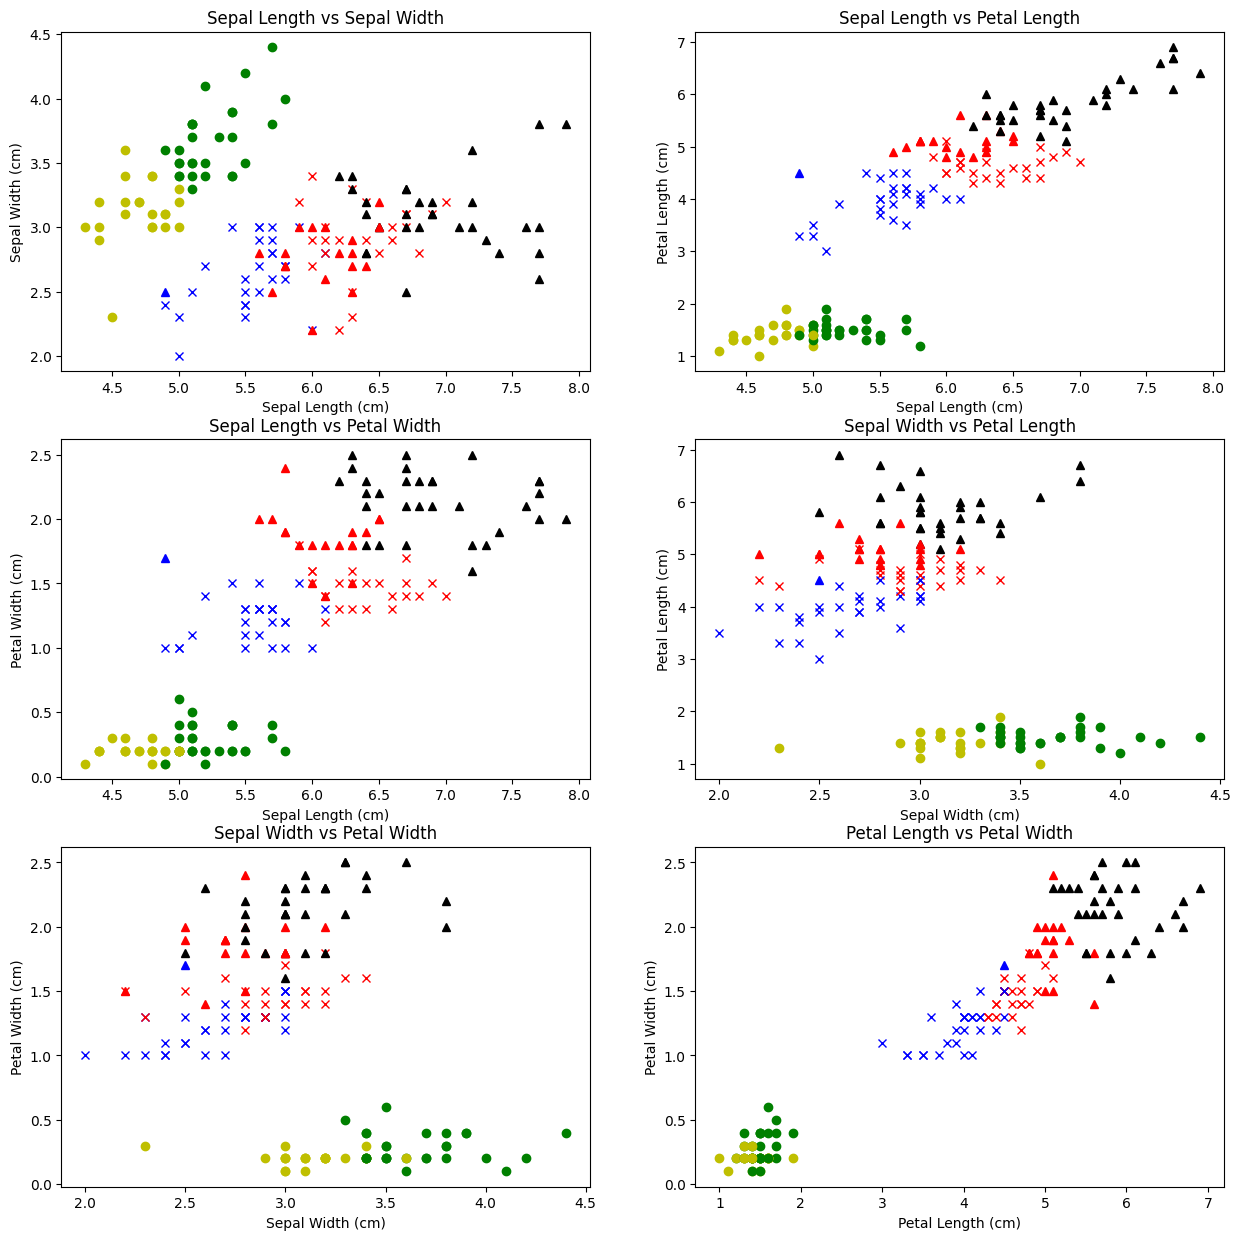

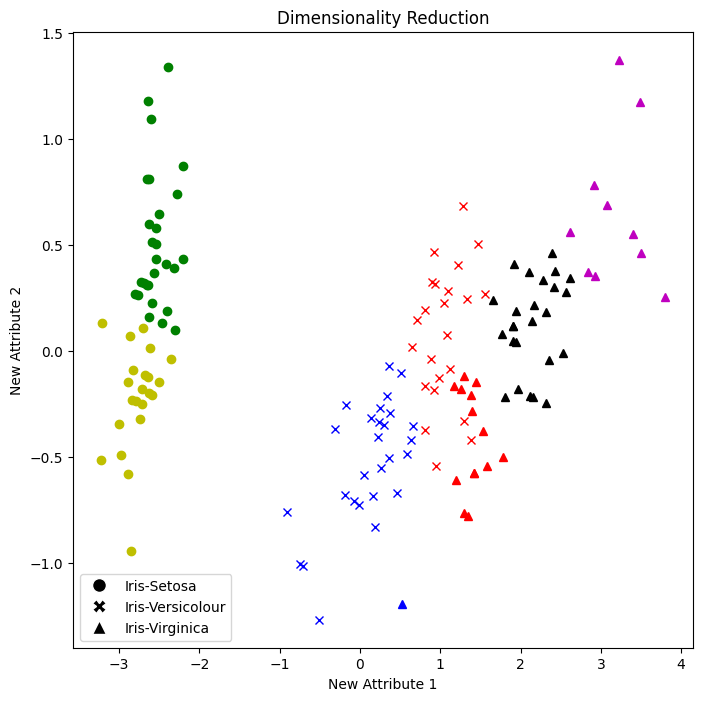

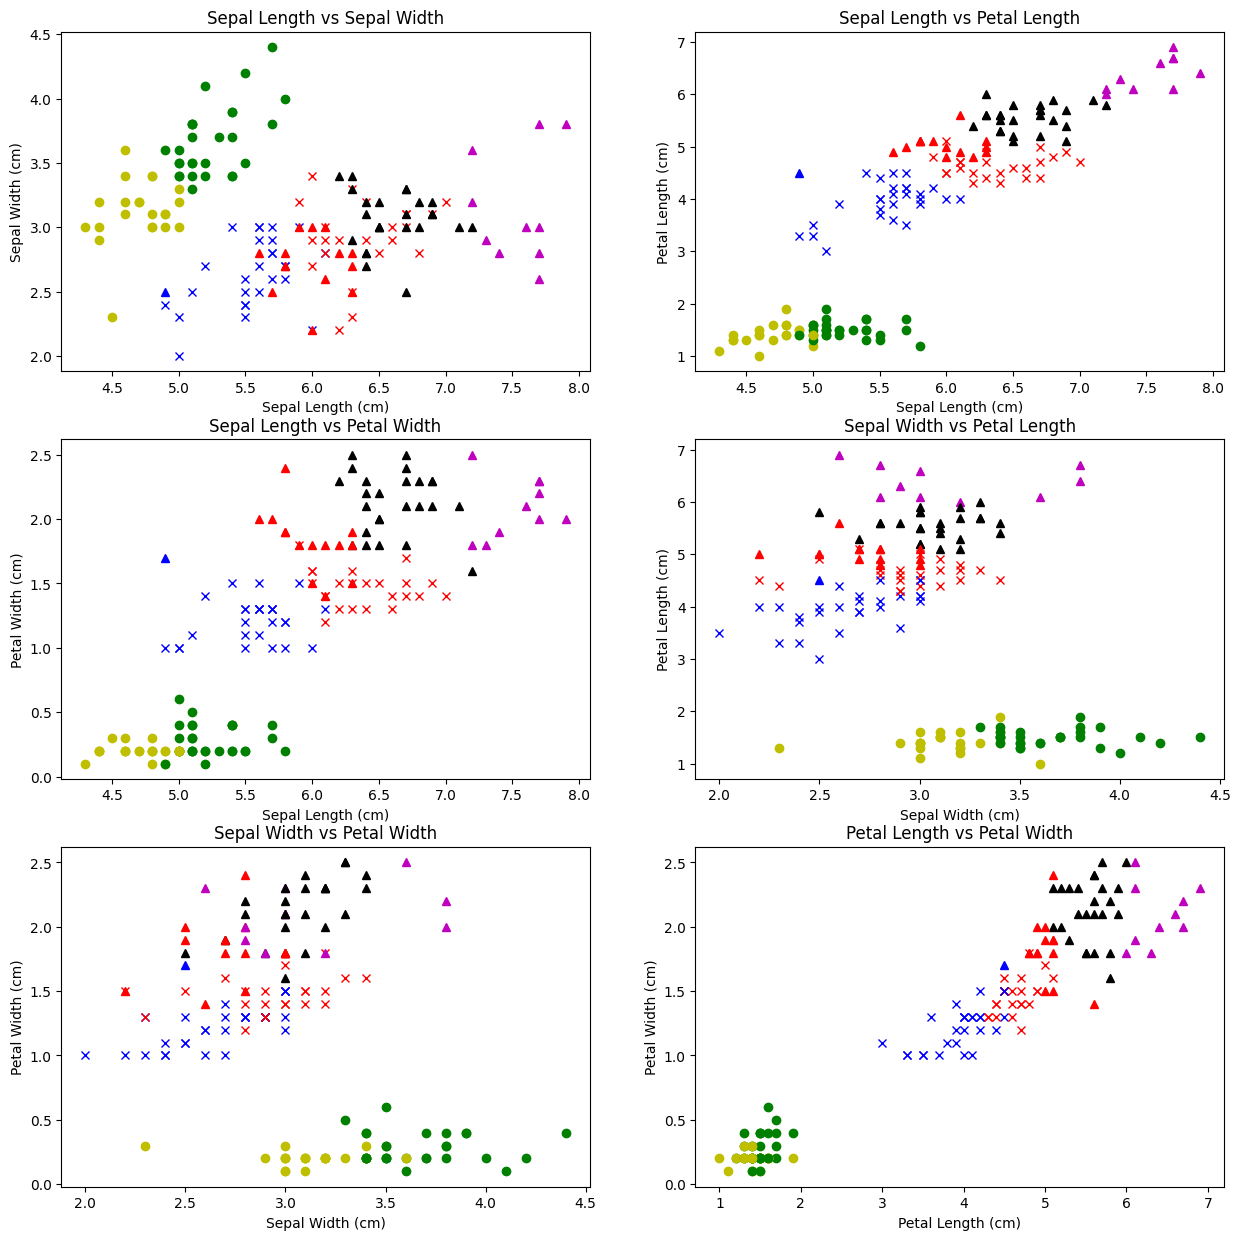

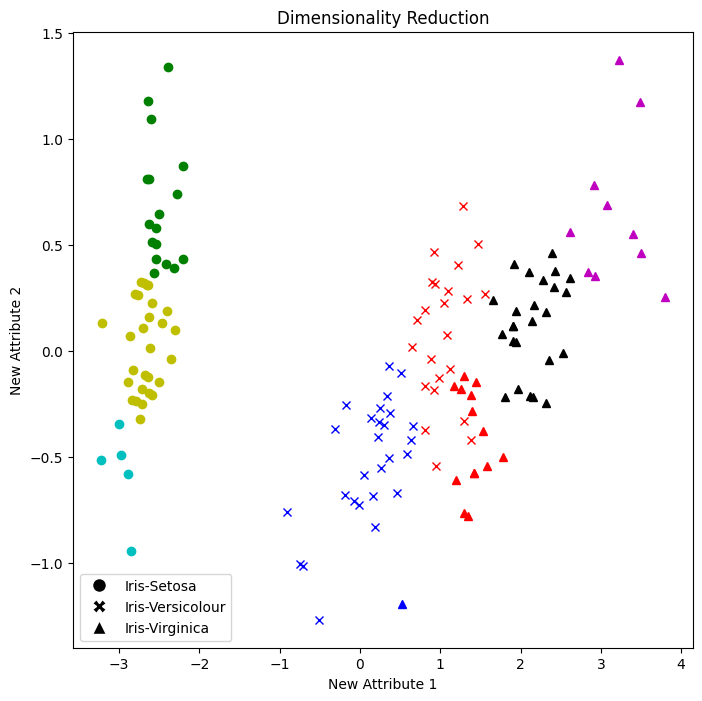

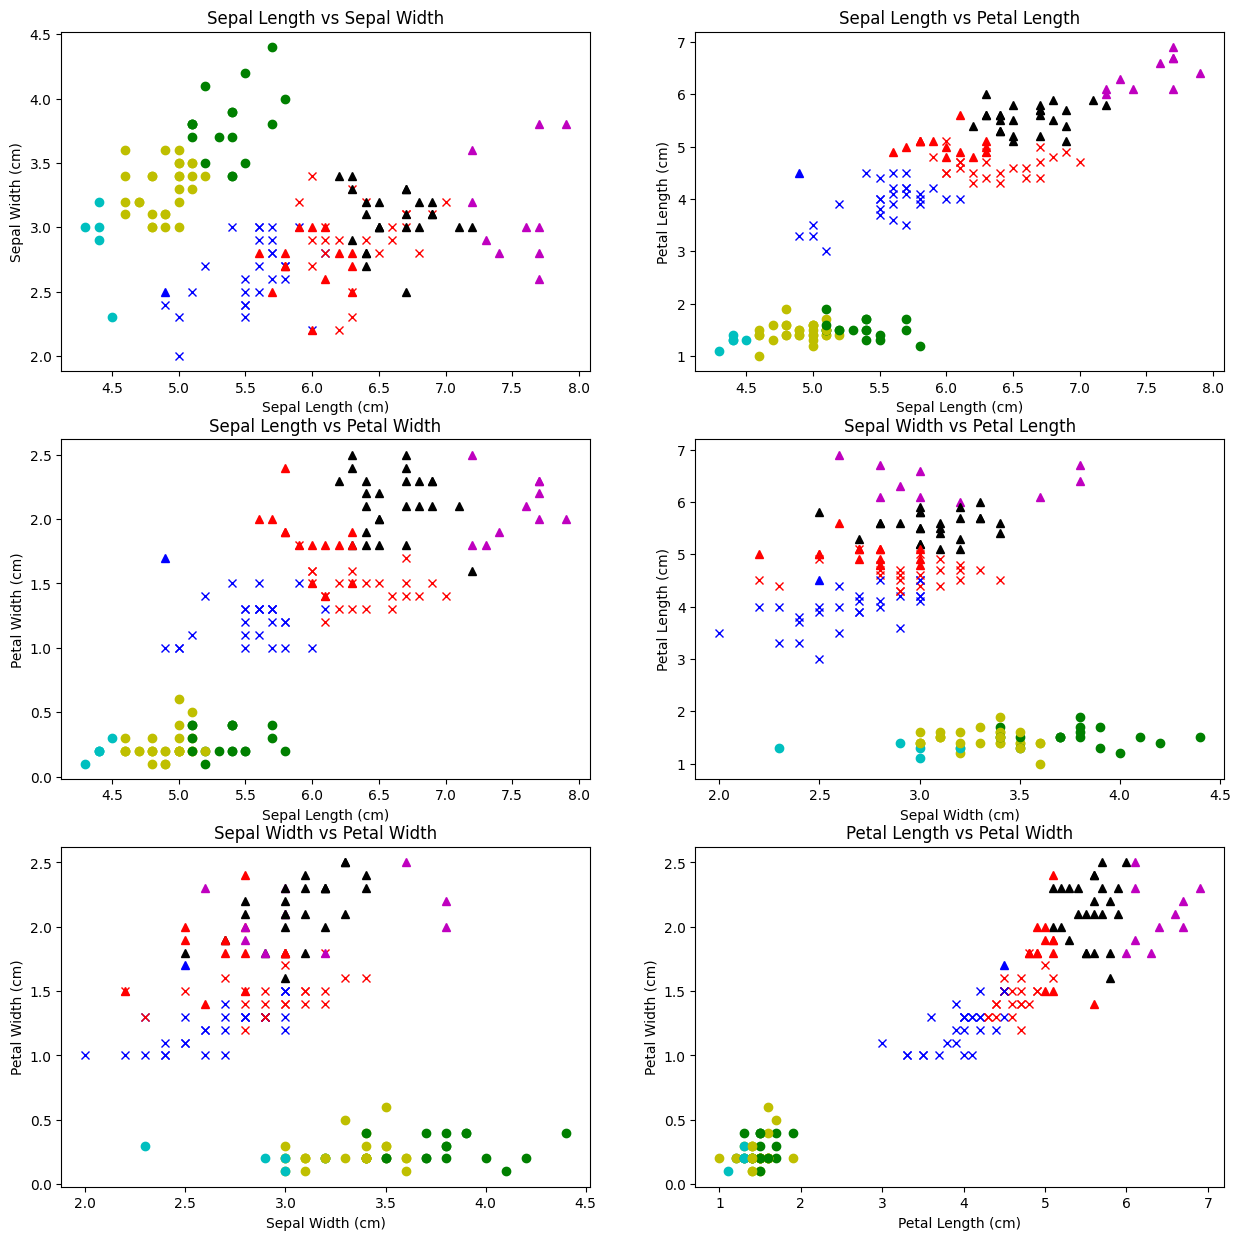

In [17]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import streamlit as st
from matplotlib.lines import Line2D
# for k in range of 1 to 7, create kmeans plot and save to ./pages/Kmeans_images/kmeans_plot{k}.png
for k in range(1,8):
    fig1, fig2 = kmeans_plot(KMeans(n_clusters=k, random_state=15,n_init='auto').fit(X), X_2D, Y)
    fig1.savefig(f'./pages/Kmeans_images/kmeans_plot1_{k}.png')
    fig2.savefig(f'./pages/Kmeans_images/kmeans_plot2_{k}.png')
